# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Load the Dataset

In [2]:
df = pd.read_csv("DCOILBRENTEU.csv", sep = ',', header = 0,parse_dates=True)
df

,DATE,DCOILBRENTEU
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9519,2023-11-14,84.2
9520,2023-11-15,82.4
9521,2023-11-16,77.73
9522,2023-11-17,81.22


# Display the first few rows of the dataset

In [3]:
df.head()

,DATE,DCOILBRENTEU
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


# Display the last few rows of the dataset

In [4]:
df.tail()

,DATE,DCOILBRENTEU
9519,2023-11-14,84.2
9520,2023-11-15,82.4
9521,2023-11-16,77.73
9522,2023-11-17,81.22
9523,2023-11-20,83.25


# Creating copy of the original DataFrame df to create a new DataFrame df1

In [5]:
df1=df.copy()

The new DataFrame df1 now contains the same data as the original DataFrame df.
Changes made to df1 will not affect df, and vice versa

# Data Cleaning
## Changing Datatype

In [6]:
# Convert the 'DATE' column to datetime format for time-related analysis
df1['DATE'] = pd.to_datetime(df1['DATE'])

# Convert the 'DCOILBRENTEU' column to numeric format, replacing non-numeric values with NaN
df1['DCOILBRENTEU'] = pd.to_numeric(df1['DCOILBRENTEU'], errors='coerce')


df1['DATE'] = pd.to_datetime(df1['DATE']): This line converts the 'DATE' column in the DataFrame df1 to a datetime format using the pd.to_datetime function. This function is used to convert argument to datetime. In this case, it is converting the values in the 'DATE' column to datetime format. The resulting datetime objects will allow for easier manipulation and analysis of time-related data.

df1['DCOILBRENTEU'] = pd.to_numeric(df1['DCOILBRENTEU'], errors='coerce'): This line converts the 'DCOILBRENTEU' column in the DataFrame df1 to numeric format using the pd.to_numeric function. The errors='coerce' parameter is used to handle any non-numeric values in the 'DCOILBRENTEU' column by replacing them with NaN (Not a Number). This conversion is useful when you want to ensure that the values in the column are treated as numeric for analysis or modeling purposes.

## Displaying Summary Information of the DataFrame

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9524 entries, 0 to 9523
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          9524 non-null   datetime64[ns]
 1   DCOILBRENTEU  9265 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 148.9 KB


The df1.info() code provides a concise summary of the information about the DataFrame, including column names,
data types, non-null counts, and memory usage. This is useful for an overview of the DataFrame structure and data completeness.

## Renaming the columns

In [8]:
# Renaming the 'DATE' column to 'Date'
df1.rename(columns={'DATE': 'Date'}, inplace=True)

# Renaming the 'DCOILBRENTEU' column to 'Price'
df1.rename(columns={'DCOILBRENTEU': 'Price'}, inplace=True)


The purpose of these renamings might be to make the column names more descriptive or standardized, which can be helpful for better readability and understanding of the data. For instance, 'DATE' might be changed to 'Date' for consistency or to adhere to a naming convention, and 'DCOILBRENTEU' might be changed to 'Price' for clarity about the content of the column.

In [9]:
df1.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [10]:
df1.tail()

,Date,Price
9519,2023-11-14,84.20
9520,2023-11-15,82.40
9521,2023-11-16,77.73
9522,2023-11-17,81.22
9523,2023-11-20,83.25


In [11]:
# Displaying the data types of each column in the DataFrame 'df1'
df1.dtypes

Date     datetime64[ns]
Price           float64
dtype: object

This is a simple command that provides information about the data types present in the DataFrame.
It helps in understanding the nature of each column, whether it contains numerical values (integers or floats), categorical data, or datetime objects.
Useful for initial data exploration and ensuring that the data types align with the intended analysis or modeling tasks.
DataFrame columns with data types like 'int64', 'float64', 'object', etc., will be displayed.

## Display descriptive statistics of the numerical columns in the DataFrame

In [12]:
df1.describe()

,Price
count,9265.000000
mean,49.370917
std,32.913727
min,9.100000
25%,19.200000
50%,41.340000
75%,72.690000
max,143.950000


 This function provides a quick overview of the central tendency, dispersion, and shape of the distribution of a dataset.

 ### Count: Number of non-null values in each column, indicating the size of the dataset.
 ### Mean: Average value of the data in each column.
 ### Std: Standard deviation, a measure of the amount of variation or dispersion of a set of values.
 ### Min: Minimum value in each column.
 ### 25%, 50%, 75%: Percentiles, representing the values below which a given percentage of observations fall.
 ### Max: Maximum value in each column.

 This summary statistics output can be helpful in identifying outliers, understanding the spread of data,
 and gaining a general sense of the distribution of numerical features.

In [13]:
# Calculate the mean (average) of each column in the DataFrame df1
df1.mean()

Price    49.370917
dtype: float64

The mean() function is useful for obtaining a central measure of tendency for each numerical variable in the dataset. The mean is calculated by summing up all values in a column and dividing by the total number of values. Understanding the mean is important for gaining insights into the central tendencies of the data and identifying potential trends or patterns.

In [14]:
# Calculate the variance of each numerical column in the DataFrame df1
df1.var()

Price    1083.313438
dtype: float64

Variance measures how much each value in a column deviates from the mean.
Higher variance indicates greater dispersion of values around the mean

In [15]:
# Calculate the kurtosis
df1.kurt()

Price   -0.735538
dtype: float64

The kurt() function provides insights into the shape of the distributions of numerical variables in the DataFrame. A kurtosis value of 0 indicates a normal distribution, negative values suggest lighter tails, and positive values suggest heavier tails compared to a normal distribution.

In [16]:
# Calculate the skewness for each column in the DataFrame df1
df1.skew()

Price    0.688983
dtype: float64

The skew() function prints or displays the computed skewness values for each numerical variable. The skewness value can be positive, negative, or close to zero.
###### Positive skewness indicates a longer right tail, meaning the data is skewed to the right.
###### Negative skewness indicates a longer left tail, meaning the data is skewed to the left.
###### Skewness close to zero suggests that the data is approximately symmetric.

In [17]:
# Check for missing values in each column of the DataFrame
df1.isnull().sum()

Date       0
Price    259
dtype: int64

In [18]:
# Filtering rows with missing values in any column
df1[df1.isnull().any(axis=1)]

,Date,Price
18,1987-06-15,NaN
157,1987-12-25,NaN
162,1988-01-01,NaN
166,1988-01-07,NaN
179,1988-01-26,NaN
...,...,...
9363,2023-04-10,NaN
9378,2023-05-01,NaN
9383,2023-05-08,NaN
9398,2023-05-29,NaN


There are 259 null values present in our data. So, we can either drop them or apply imputation technique to fill the null values

In [19]:
# Drop missing values
df1.dropna(inplace=True)

# Exploratory Data Analysis (EDA)

## Outlier Detection

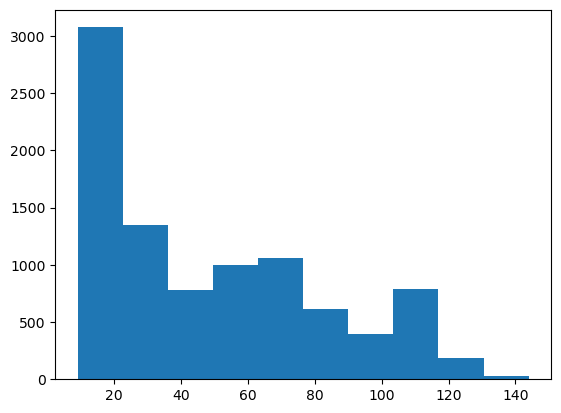

In [20]:
# Create a histogram of the 'Price' column in the DataFrame
plt.hist(df1['Price'])
plt.show()

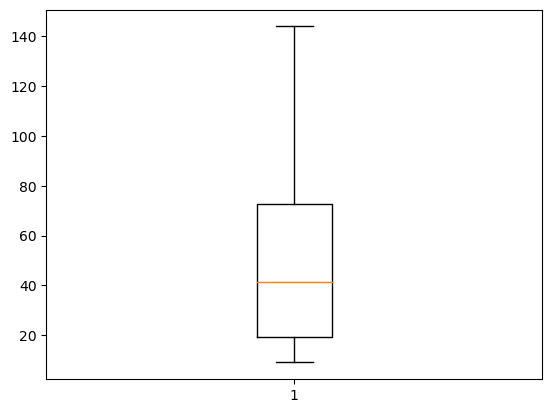

In [21]:
# Create a boxplot for the 'Price' column in the DataFrame
plt.boxplot(df1['Price'])
plt.show()

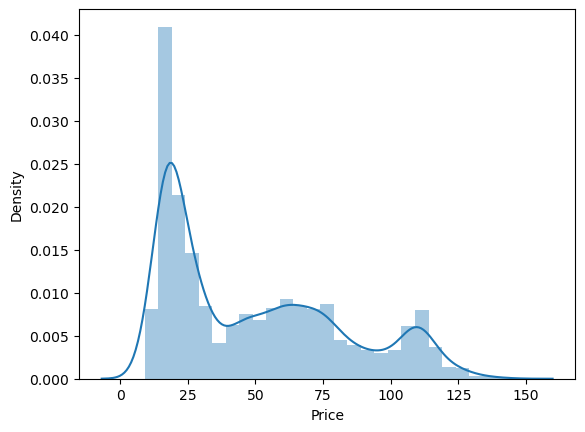

In [22]:
# Plot a distribution plot for the 'Price' column
sns.distplot(df1['Price'])
plt.show()

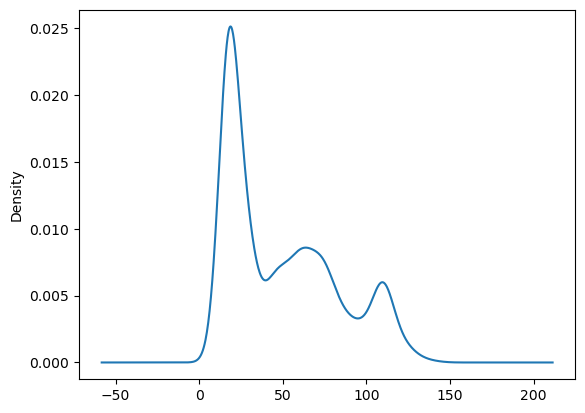

In [23]:
# Plot the Kernel Density Estimate (KDE) for the 'Price' column
df1['Price'].plot(kind='kde')
plt.show()

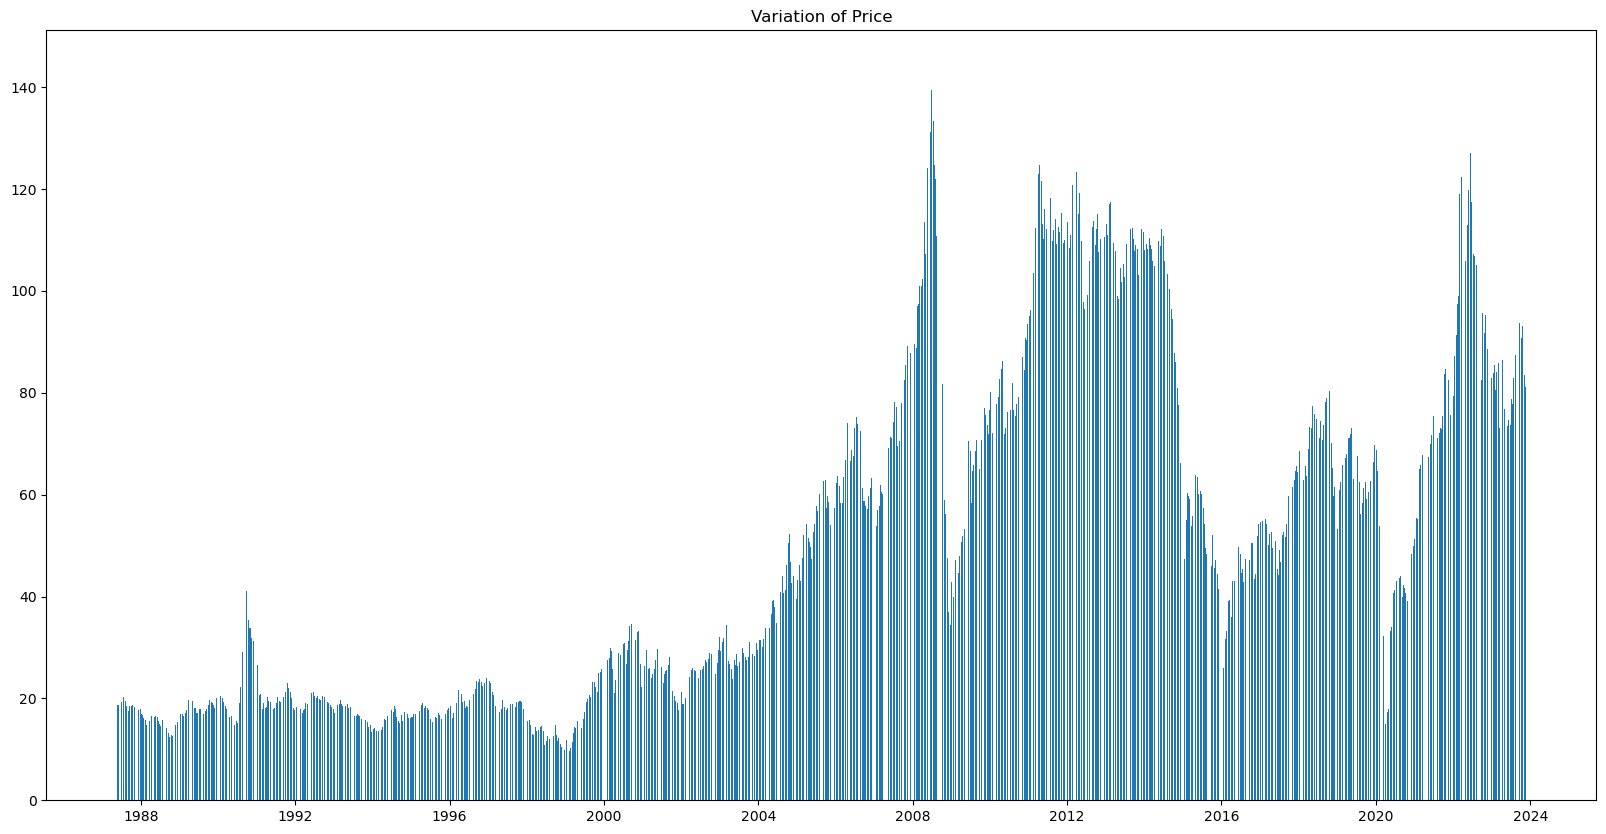

In [24]:
# Setting the size of the figure
plt.figure(figsize=(20, 10))

# Extracting data for plotting
x = df1['Date']  # Assuming 'Date' is the column representing time
y = df1['Price']  # Assuming 'Price' is the column representing the variable to be visualized

# Creating a bar chart
plt.bar(x, y)

# Adding a title to the chart
plt.title('Variation of Price')

# Displaying the chart
plt.show()


# Data Exploration
## Visualizing Full Data as a line plot

In [25]:
import seaborn as sns
from matplotlib import pyplot as plt

df1['Date'] = pd.to_datetime(df1['Date'], format="%b %d, %Y")
df1.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


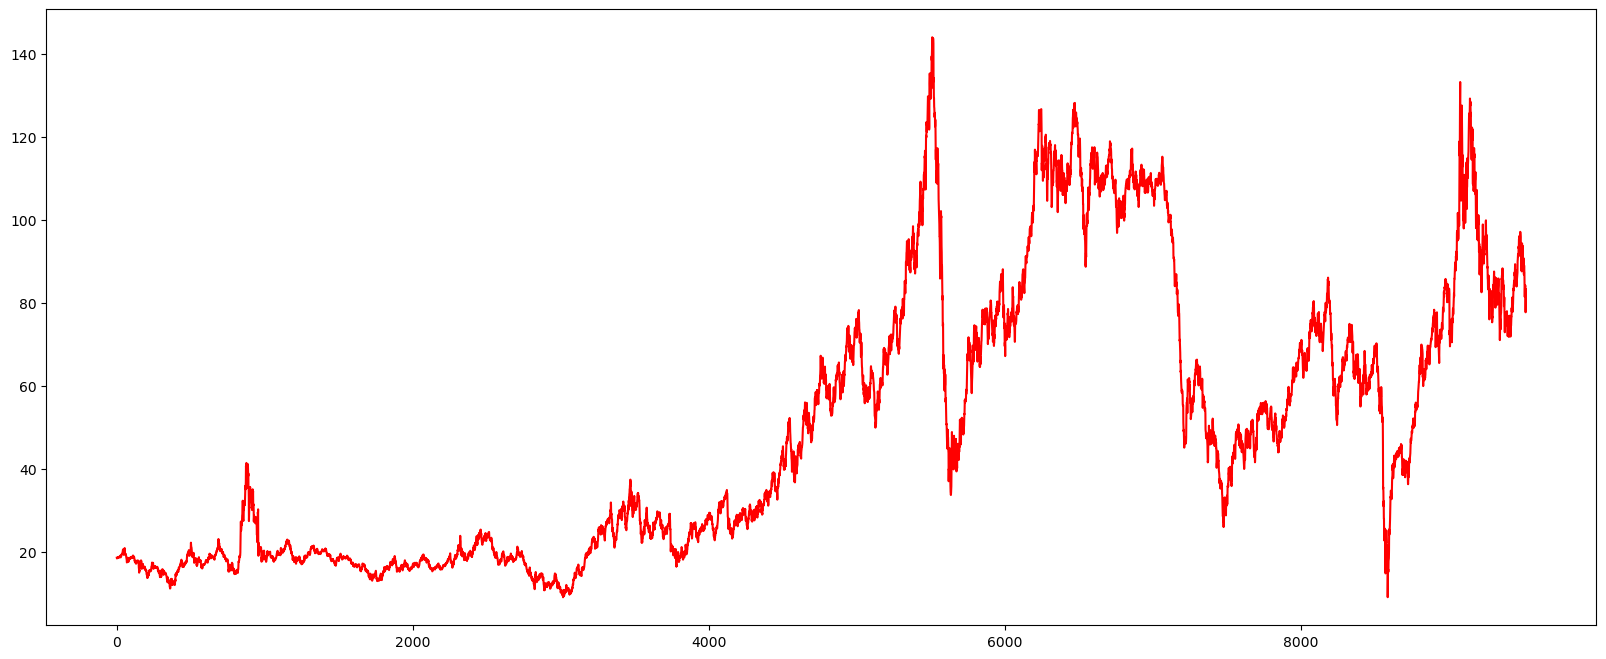

In [26]:
# Plotting the 'Price' column
df1['Price'].plot(figsize=(20, 8),color='red')
plt.show()

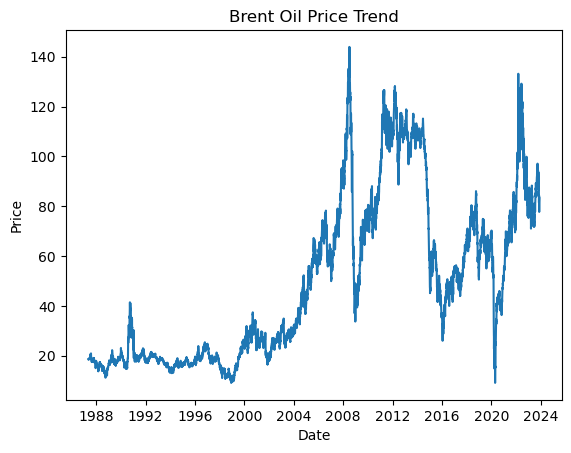

In [27]:
# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a line plot using Seaborn

g = sns.lineplot(x='Date', y='Price', data=df1)

# Adding a title to the plot
plt.title("Brent Oil Price Trend")

# Display the plot
plt.show()


## Function to plot Oil Price Trend between specific period

In [28]:
def plot_price_trend(df1, start_date, end_date):
    mask = (df1['Date'] > start_date) & (df1['Date'] <= end_date)
    sdf = df1.loc[mask]
    plt.figure(figsize = (10,5))
    chart = sns.lineplot(x='Date',y='Price',data = sdf)
#     chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    plt.title("Brent Oil Price Trend")

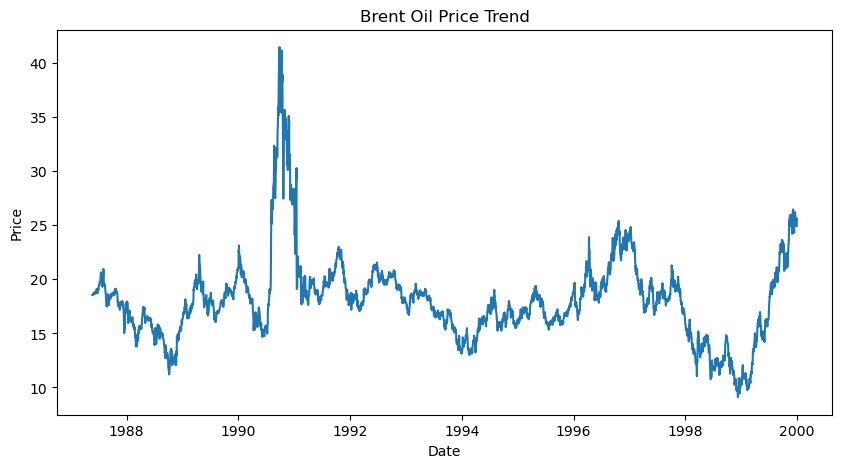

In [29]:
plot_price_trend(df1,'1987-05-21','2000-01-01')

##### The above plot shows the trend of Brent Oil prices within a date '1987-05-21' to '2000-01-01'.

In [30]:
def plot_price_trend1(df1, start_date, end_date):
    mask = (df1['Date'] > start_date) & (df1['Date'] <= end_date)
    sdf = df1.loc[mask]
    plt.figure(figsize = (10,5))
    chart = sns.lineplot(x='Date',y='Price',data = sdf)
#     chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    plt.title("Brent Oil Price Trend")

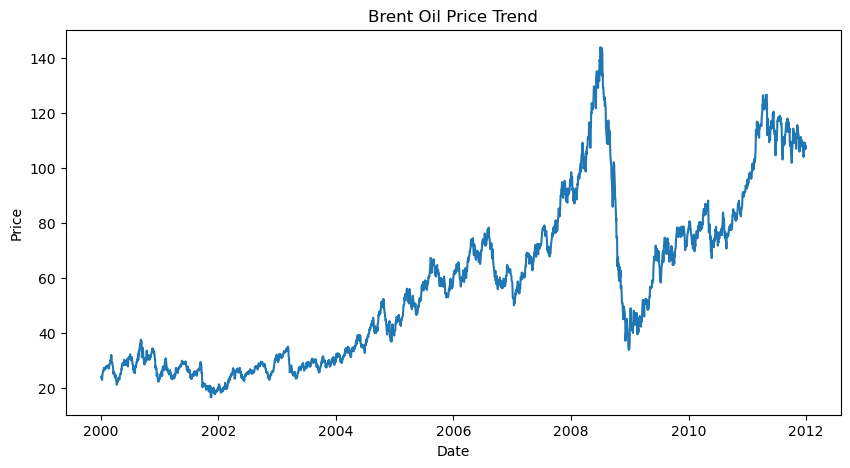

In [31]:
plot_price_trend1(df1,'2000-01-01','2012-01-01')

##### The above plot shows the trend of Brent Oil prices within a date '2000-01-01' to '2012-01-01'.

In [32]:
def plot_price_trend2(df1, start_date, end_date):
    mask = (df1['Date'] > start_date) & (df1['Date'] <= end_date)
    sdf = df1.loc[mask]
    plt.figure(figsize = (10,5))
    chart = sns.lineplot(x='Date',y='Price',data = sdf)
#     chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    plt.title("Brent Oil Price Trend")

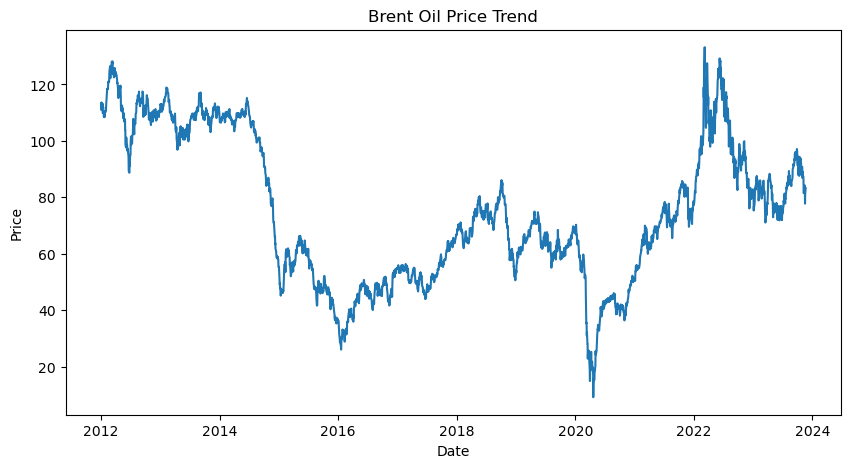

In [33]:
plot_price_trend2(df1,'2012-01-01','2023-11-20')

##### The above plot shows the trend of Brent Oil prices within a date '1987-05-21' to '2000-01-01'.

# Forecasting Models
## 1) Using ARIMA (AutoRegressive Integrated Moving Average)

In [34]:
# Copying the original DataFrame (df1) to a new DataFrame (pro_df)
pro_df = df1

# Renaming the columns of the new DataFrame
pro_df.columns = ['ds', 'y']

# Displaying the first few rows of the new DataFrame
pro_df.head()


,ds,y
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


##### Step 1) - First we import the required libraries

In [35]:
from statsmodels.tsa.arima.model import ARIMA    # ARIMA Modeling
from statsmodels.tsa.stattools import adfuller   # Augmented Dickey-Fuller Test for Checking Stationary
from statsmodels.tsa.stattools import acf, pacf  # Finding ARIMA parameters using Autocorrelation
from statsmodels.tsa.seasonal import seasonal_decompose # Decompose the ARIMA Forecast model
#from pmdarima import auto_arima

##### Step 2) - Arima requires the date column to be set as index

In [36]:
arima_df = pro_df.set_index('ds')
arima_df.head()

,y
ds,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


###### Step 3) - Next we write a function that plots the Rolling mean and standard deviation and then checks the stationarity of the time series using Augmented Dickey - Fuller Test


## Augmented Dickey-Fuller (ADF) Test
### Initial ADF Test:

In [37]:
# Perform Augmented Dickey–Fuller test to check if the given Time series is stationary:
def test_stationarity(ts):

    #Determing rolling statistics
    rolmean = ts.rolling(window=12).mean()
    rolstd = ts.rolling(window=12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(12,8))
    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts['y'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

def test_stationarity(ts):: This line defines a function named test_stationarity that takes a time series ts as its parameter.

rolmean = ts.rolling(window=12).mean(): Calculates the rolling mean with a window of 12 observations. Rolling statistics are useful for visualizing trends and identifying seasonality patterns.

rolstd = ts.rolling(window=12).std(): Calculates the rolling standard deviation with a window of 12 observations. This helps in identifying variations and fluctuations in the time series.

plt.figure(figsize=(12,8)): Creates a new figure with a specified size of 12 inches by 8 inches.

orig = plt.plot(ts, color='blue', label='Original'): Plots the original time series in blue.

mean = plt.plot(rolmean, color='red', label='Rolling Mean'): Plots the rolling mean in red.

std = plt.plot(rolstd, color='black', label='Rolling Std'): Plots the rolling standard deviation in black.

plt.legend(loc='best'): Adds a legend to the plot at the best location.

plt.title('Rolling Mean & Standard Deviation'): Sets the title of the plot.

plt.show(block=False): Displays the plot without blocking the execution of the code.

print('Results of Dickey-Fuller Test:'): Prints a message indicating that the Dickey-Fuller test results will be displayed.

dftest = adfuller(ts['y'], autolag='AIC'): Performs the Augmented Dickey-Fuller test on the time series (ts). The autolag='AIC' parameter automatically selects the lag length based on the Akaike Information Criterion (AIC).

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']): Creates a pandas Series containing the test statistics and related information.

The subsequent for loop populates the critical values for different confidence levels in the Dickey-Fuller test.

print(dfoutput): Prints the results of the Dickey-Fuller test, including the test statistic, p-value, number of lags used, and the number of observations used.

##### Step 4) - Next, we use this function to check if our given timeseries data is stationary or not

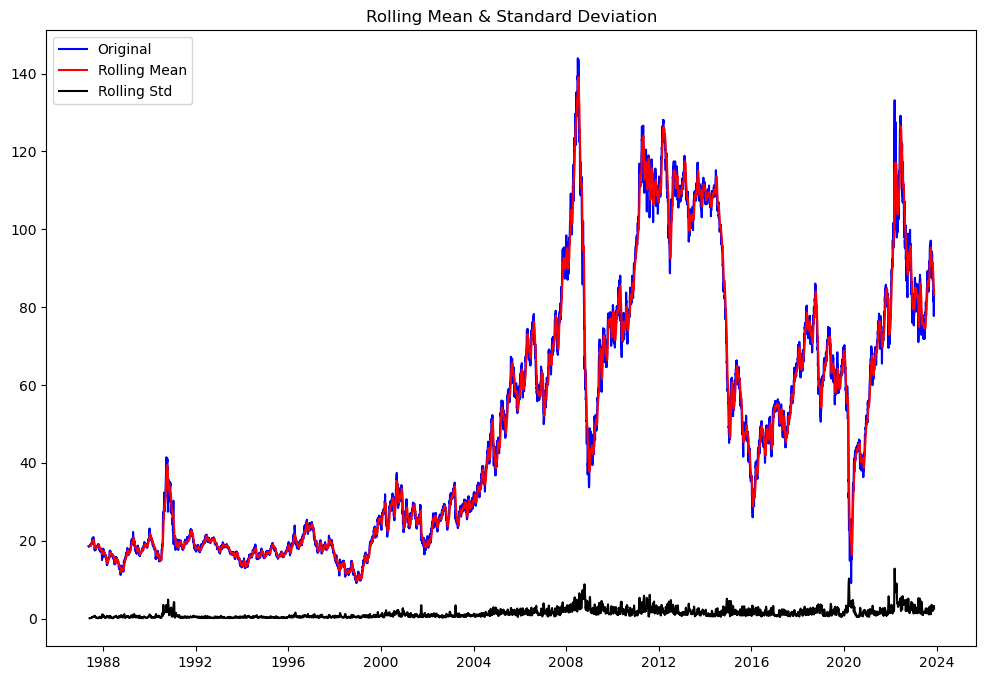

Results of Dickey-Fuller Test:
Test Statistic                   -2.128091
p-value                           0.233370
#Lags Used                       29.000000
Number of Observations Used    9235.000000
Critical Value (1%)              -3.431058
Critical Value (5%)              -2.861853
Critical Value (10%)             -2.566937
dtype: float64


In [38]:
test_stationarity(arima_df)

Observation - The null hypothesis of ADF test is the Time series is NOT stationary. We see that the Test Statistic (-1.95) is higher than 10% Critical Value (-2.56). This means this result is statistically significant at 90% confidence interval and so, we fail to reject the null hypothesis.

This means that our time series data is NOT stationary.

##### This function test_stationarity takes a time series (ts) as input, calculates rolling statistics (mean and standard deviation), plots them, and performs the Augmented Dickey-Fuller (ADF) test to check for stationarity.

##### The ADF test results are printed, including the test statistic, p-value, number of lags used, and critical values. The key indicator is the p-value. If the p-value is below a certain significance level (commonly 0.05), we can reject the null hypothesis of non-stationarity.

##### Step 5) - Some definitions -

Correlation - Describes how much two variables depend on each other.

Partial Correlation - When multiple variables are involved, two variables may have direct relation as well as indirect relation (i.e x1 and x3 are related and x2 and x3 are related. Due to this indirect relation, x1 and x2 might be related). This is called partial correlation.

Auto Correlation - In a time series data, variable at a time step is dependent upon its lag values. This is called auto-correlation (i.e. variable depending upon its own values)

Partial Autocorrelation - describes correlation of a variable with its lag values after removing the effect of indirect correlation.



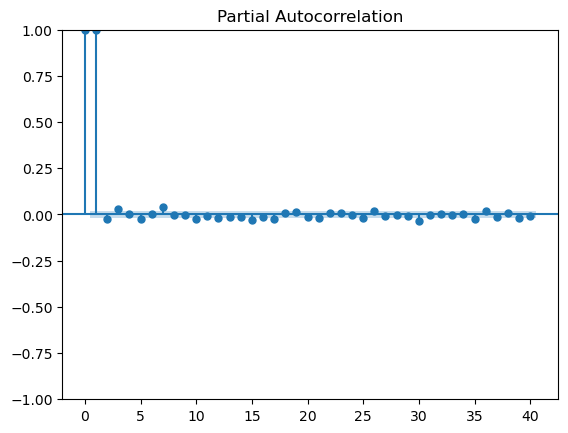

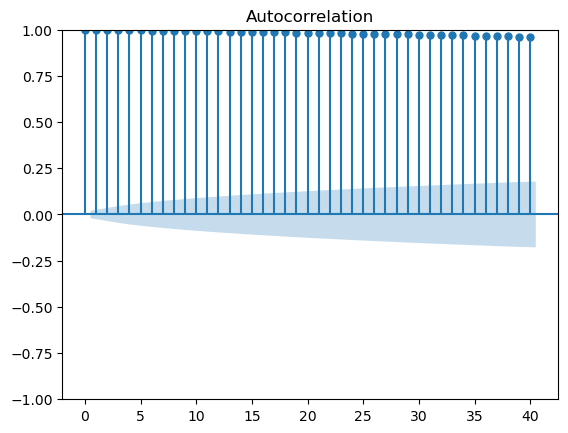

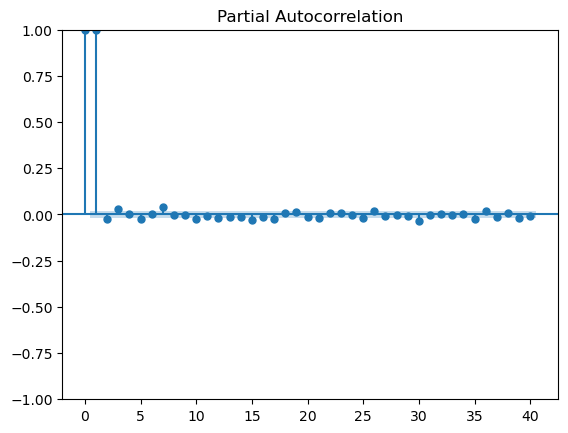

In [39]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(arima_df)
plot_pacf(arima_df)

The plot_acf and plot_pacf functions from the statsmodels.graphics.tsaplots module to generate autocorrelation and partial autocorrelation plots for a time series. These plots are useful for identifying the autocorrelation structure in a time series, which is essential for choosing appropriate parameters for time series models like ARIMA (AutoRegressive Integrated Moving Average).


The autocorrelation plot (ACF) for the time series data provided in the DataFrame arima_df. The autocorrelation plot shows the correlation coefficients between the time series and its lagged values at different lag distances. It helps in identifying the order of the AutoRegressive (AR) component in an ARIMA model.


The partial autocorrelation plot (PACF) for the time series data provided in the DataFrame arima_df. The partial autocorrelation plot shows the correlation between the time series and its lagged values while adjusting for the effects of intermediate lags. It helps in identifying the order of the AutoRegressive (AR) component in an ARIMA model.

In [40]:
# Implementing own function to create ACF plot
def get_acf_plot(ts):
    #calling acf function from stattools
    y = ts['y']
    lag_acf = acf(y, nlags=500)
    plt.figure(figsize=(16, 7))
    plt.plot(lag_acf, marker="o")
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
    plt.title('Autocorrelation Function')
    plt.xlabel('number of lags')
    plt.ylabel('correlation')

def get_pacf_plot(ts):
    #calling pacf function from stattools
    y = arima_df['y']
    lag_pacf = pacf(y, nlags=50)
    plt.figure(figsize=(16, 7))
    plt.plot(lag_pacf, marker="o")
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
    plt.title('Partial Autocorrelation Function')
    plt.xlabel('number of lags')
    plt.ylabel('correlation')

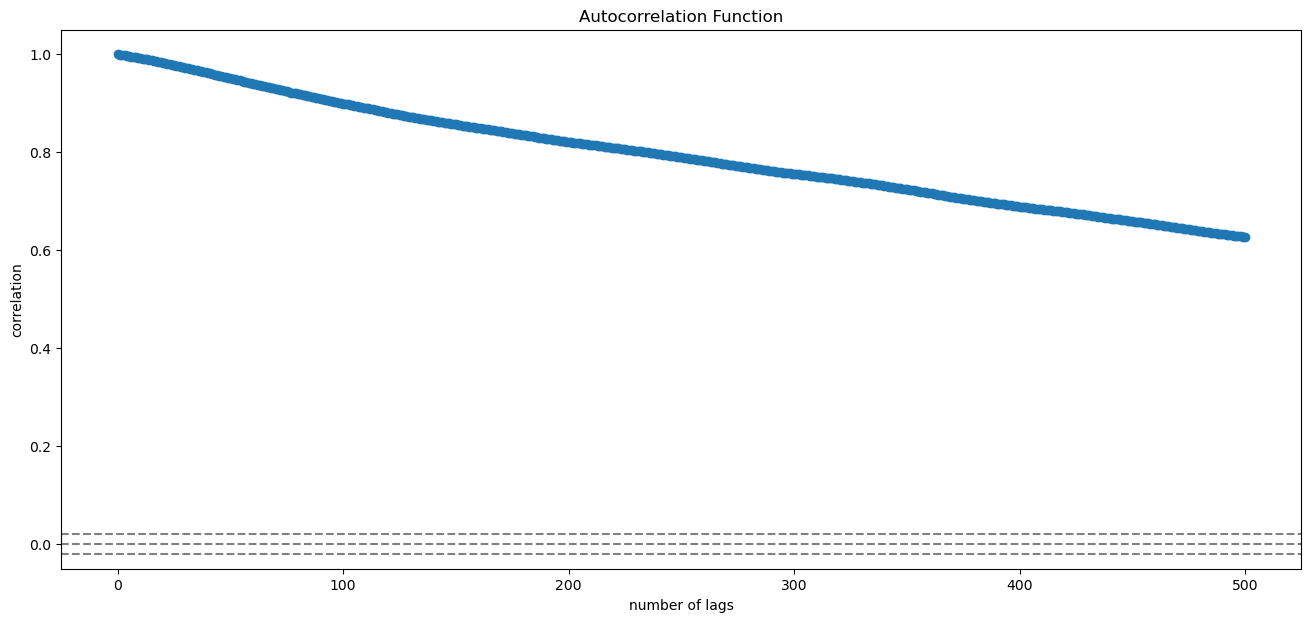

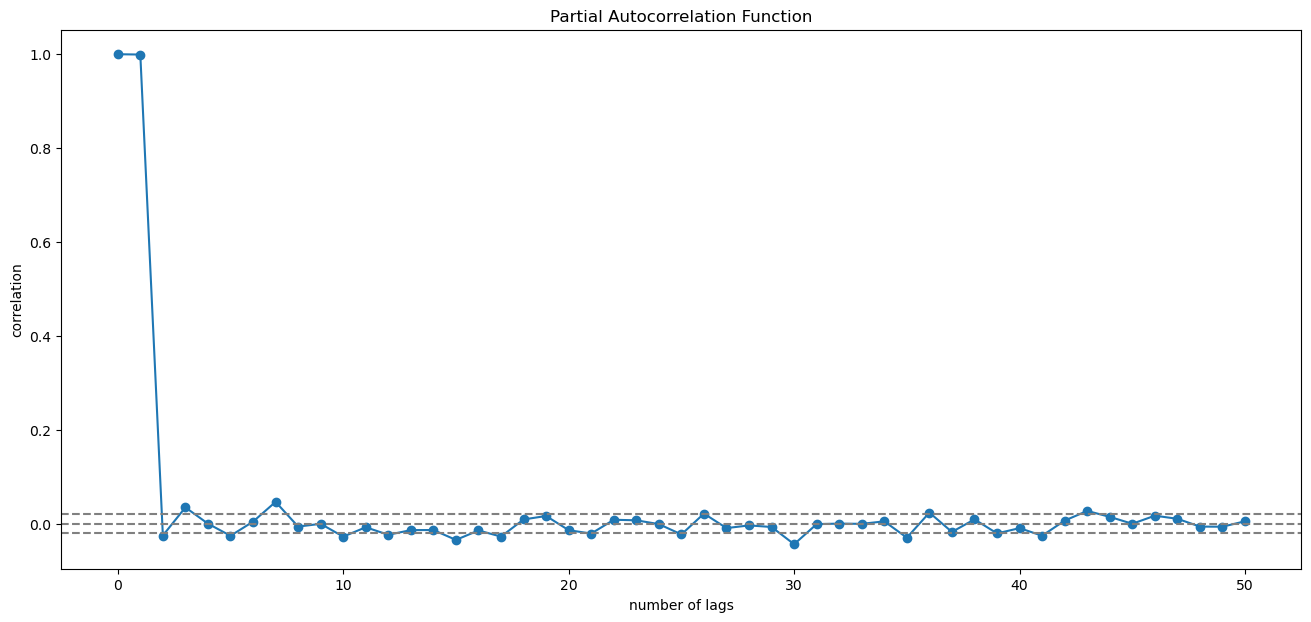

In [41]:
get_acf_plot(arima_df)
get_pacf_plot(arima_df)

get_acf_plot Function:

This function takes a time series (ts) as input, assuming it has a 'y' column.
It calculates the autocorrelation function (ACF) using the acf function from stattools.
The ACF values are then plotted against the number of lags using plt.plot.
Horizontal dashed lines are drawn at 0, -1.96, and 1.96 to indicate the 95% confidence interval.
The resulting plot provides insights into the autocorrelation structure of the time series.


get_pacf_plot Function:

This function takes a time series (ts) as input, assuming it has a 'y' column.
It calculates the partial autocorrelation function (PACF) using the pacf function from stattools.
The PACF values are then plotted against the number of lags using plt.plot.
Similar to ACF, horizontal dashed lines are drawn at 0, -1.96, and 1.96 for reference.
The resulting plot provides insights into the partial autocorrelation structure of the time series.


Calling the Functions:

The functions are then called with the arima_df DataFrame, assuming it has a 'y' column.
This will generate and display the ACF and PACF plots for the given time series.
These plots are essential in identifying the order of the AutoRegressive (AR) and Moving Average (MA) components when building ARIMA models. They help in determining the appropriate lag values for constructing the model.

##### Step 6) - Next we see some methods to make the data stationary

## Transformation Steps for Achieving Stationarity


### Log Transformation:

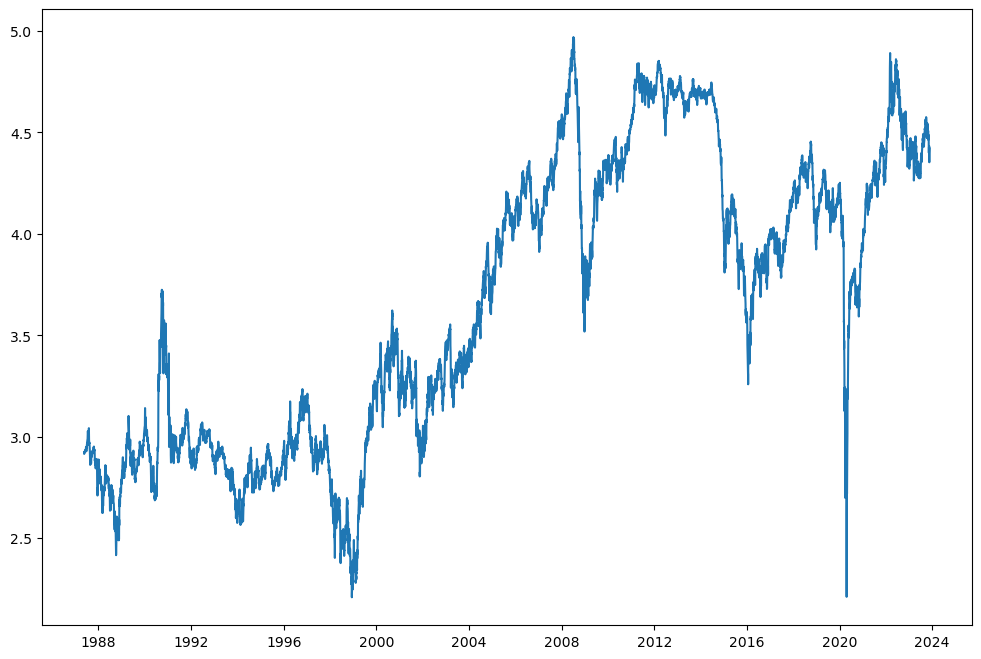

In [42]:
# Log Transformation
ts_log = np.log(arima_df)
plt.figure(figsize=(12,8))
plt.plot(ts_log)

Log transformations are commonly used in time series analysis to stabilize the variance and make the data more amenable to modeling, especially when dealing with data that exhibits multiplicative trends or heteroscedasticity.

This step applies a logarithmic transformation to the time series data (arima_df) to stabilize the variance and make the data more amenable to stationarity.

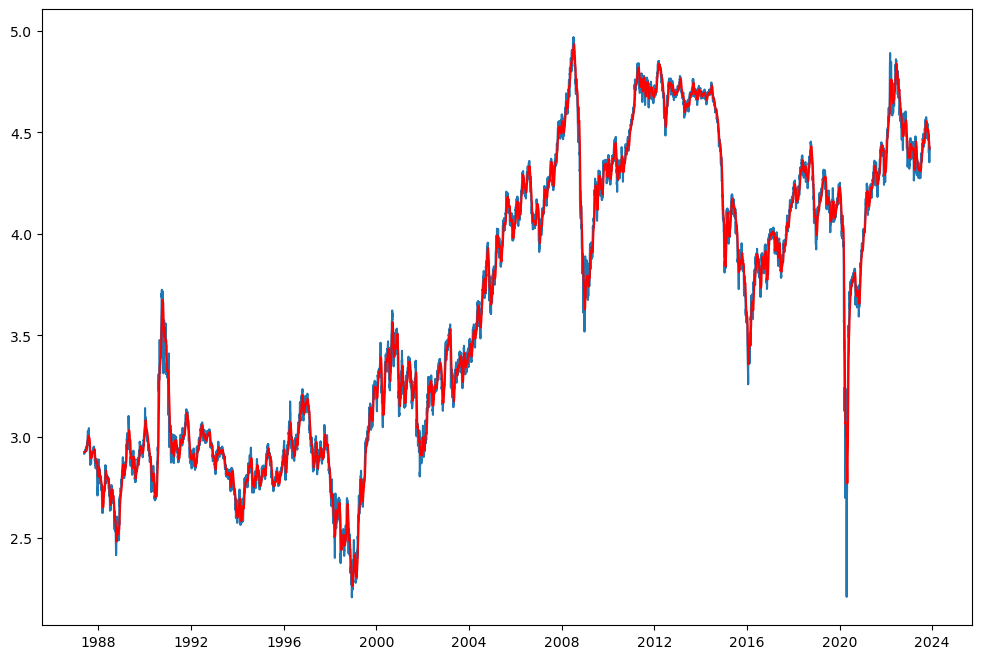

In [43]:
# Moving Average of last 12 values
moving_avg = ts_log.rolling(12).mean()
plt.figure(figsize=(12,8))
plt.plot(ts_log)
plt.plot(moving_avg, color='red')


In forecasting, a Moving Average (MA) is a statistical calculation used to analyze data points over a certain period of time. It is a commonly used method for smoothing out fluctuations or noise in time series data, making it easier to identify trends and patterns. The Moving Average is particularly useful for reducing the impact of short-term fluctuations in the data, providing a clearer picture of the underlying trend.

In [44]:
# Differencing
ts_log_ma_diff = ts_log - moving_avg
ts_log_ma_diff.head(12)

,y
ds,
1987-05-20,NaN
1987-05-21,NaN
1987-05-22,NaN
1987-05-25,NaN
1987-05-26,NaN
1987-05-27,NaN
1987-05-28,NaN
1987-05-29,NaN
1987-06-01,NaN



Differencing is a technique used in time series analysis to stabilize the mean and eliminate trend and seasonality from the data. It involves computing the differences between consecutive observations in a time series. The differenced series is created by subtracting the previous observation from the current one. The main idea is to transform a non-stationary time series into a stationary one, making it more amenable to various modeling techniques, such as forecasting using autoregressive integrated moving average (ARIMA) models.

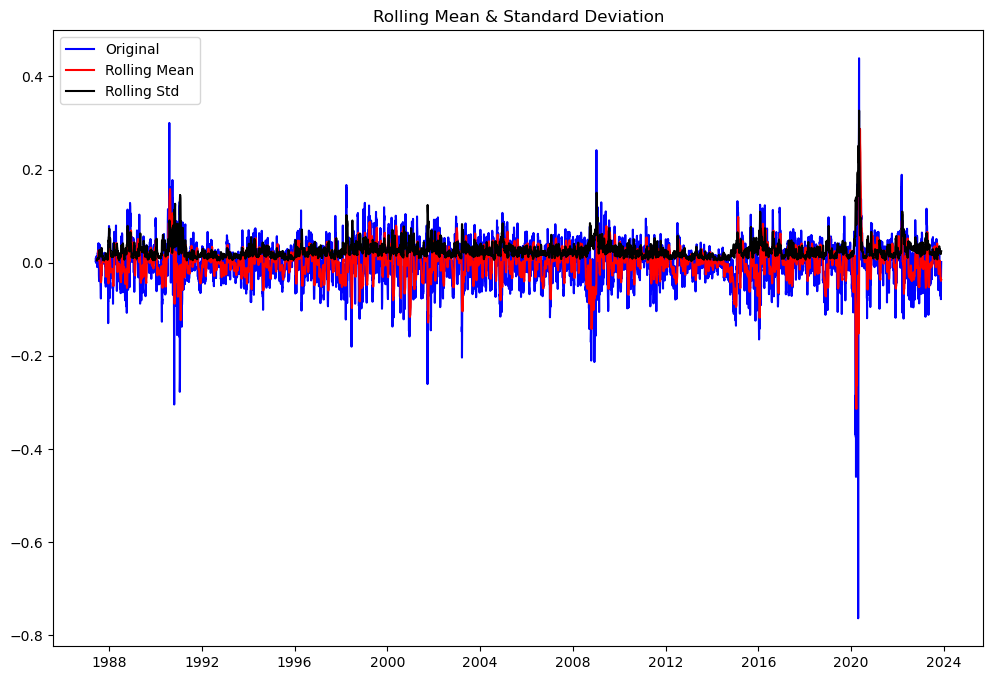

Results of Dickey-Fuller Test:
Test Statistic                -1.574826e+01
p-value                        1.232204e-28
#Lags Used                     2.900000e+01
Number of Observations Used    9.224000e+03
Critical Value (1%)           -3.431059e+00
Critical Value (5%)           -2.861853e+00
Critical Value (10%)          -2.566937e+00
dtype: float64


In [45]:
ts_log_ma_diff.dropna(inplace=True)
test_stationarity(ts_log_ma_diff)

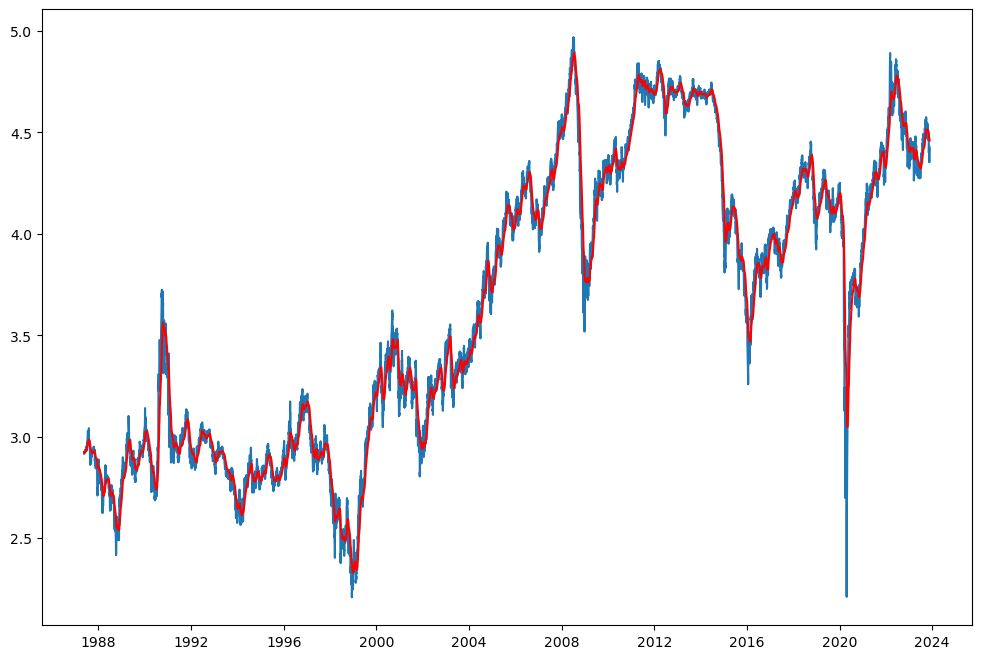

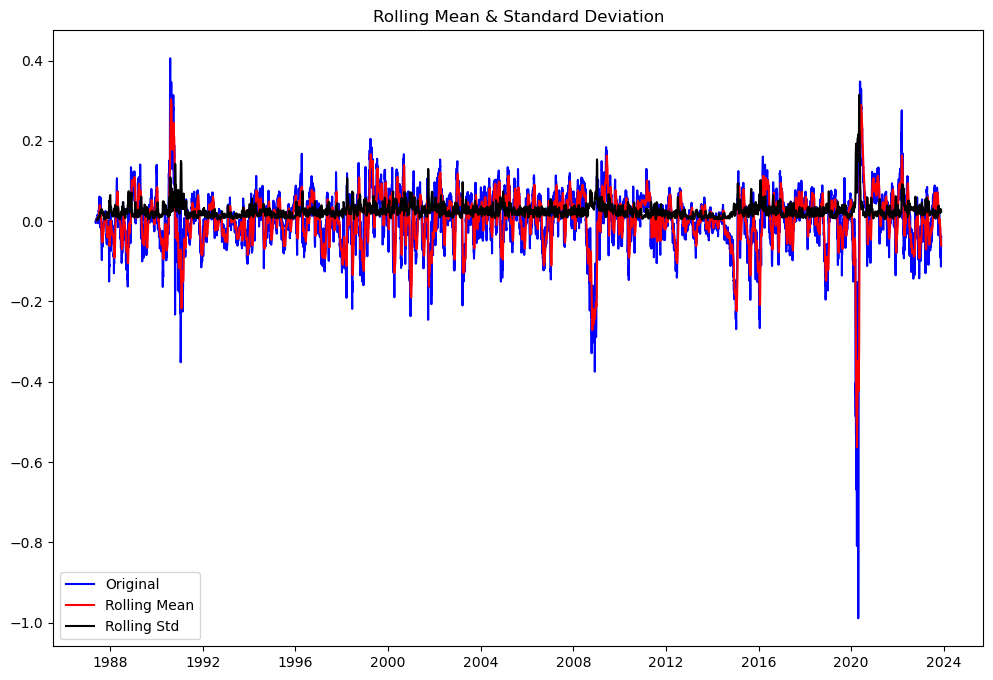

Results of Dickey-Fuller Test:
Test Statistic                -1.291460e+01
p-value                        3.990628e-24
#Lags Used                     2.900000e+01
Number of Observations Used    9.235000e+03
Critical Value (1%)           -3.431058e+00
Critical Value (5%)           -2.861853e+00
Critical Value (10%)          -2.566937e+00
dtype: float64


In [46]:
# Exponentially weighted moving average
expwighted_avg = ts_log.ewm(halflife=12).mean()

plt.figure(figsize=(12,8))
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)


Exponentially Weighted Moving Average (EWMA) is a statistical method used in time series analysis and forecasting to assign exponentially decreasing weights to observed data points. It is a type of moving average that places more weight on recent observations and less weight on older ones. The EWMA is particularly useful for capturing trends and detecting patterns in time series data while giving more importance to recent values.

##### Step 8) - ARIMA models

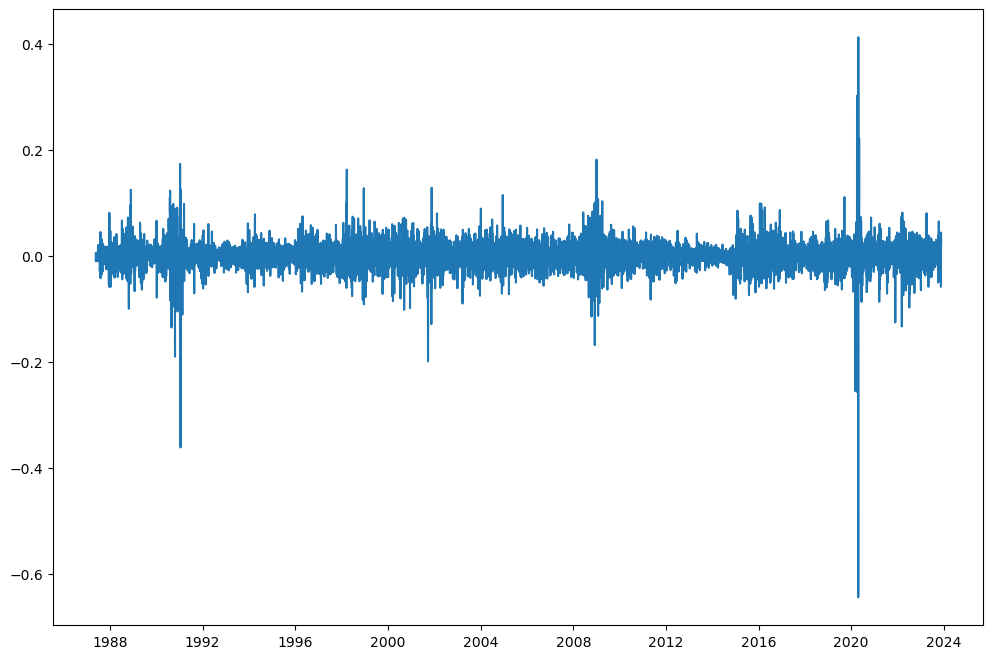

In [47]:
ts_log_diff = ts_log - ts_log.shift()
plt.figure(figsize=(12,8))
plt.plot(ts_log_diff)

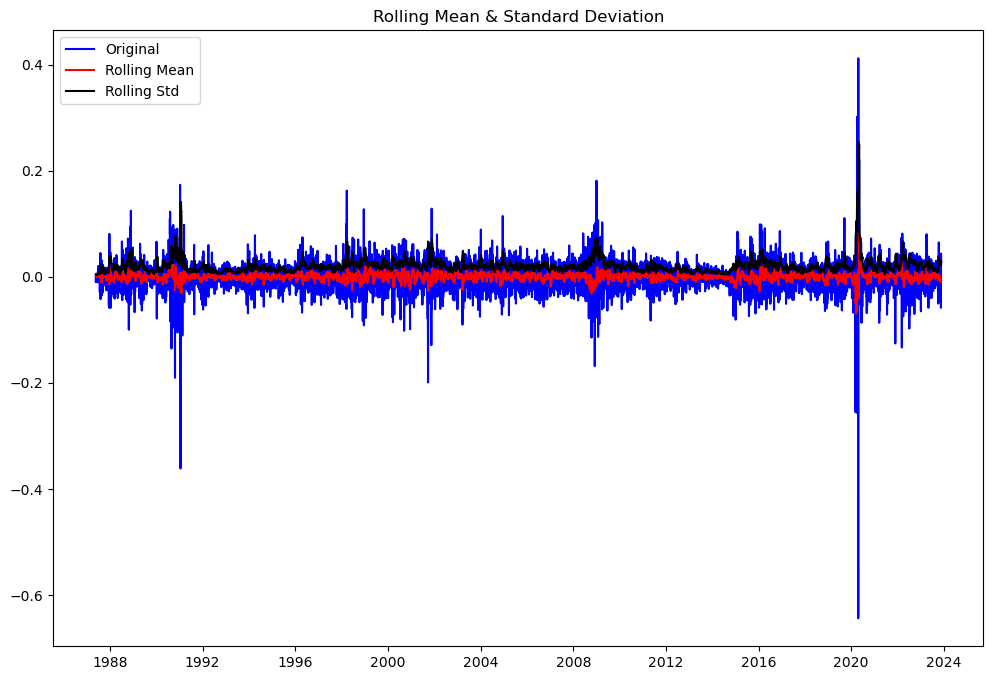

Results of Dickey-Fuller Test:
Test Statistic                -1.668153e+01
p-value                        1.514939e-29
#Lags Used                     2.800000e+01
Number of Observations Used    9.235000e+03
Critical Value (1%)           -3.431058e+00
Critical Value (5%)           -2.861853e+00
Critical Value (10%)          -2.566937e+00
dtype: float64


In [48]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

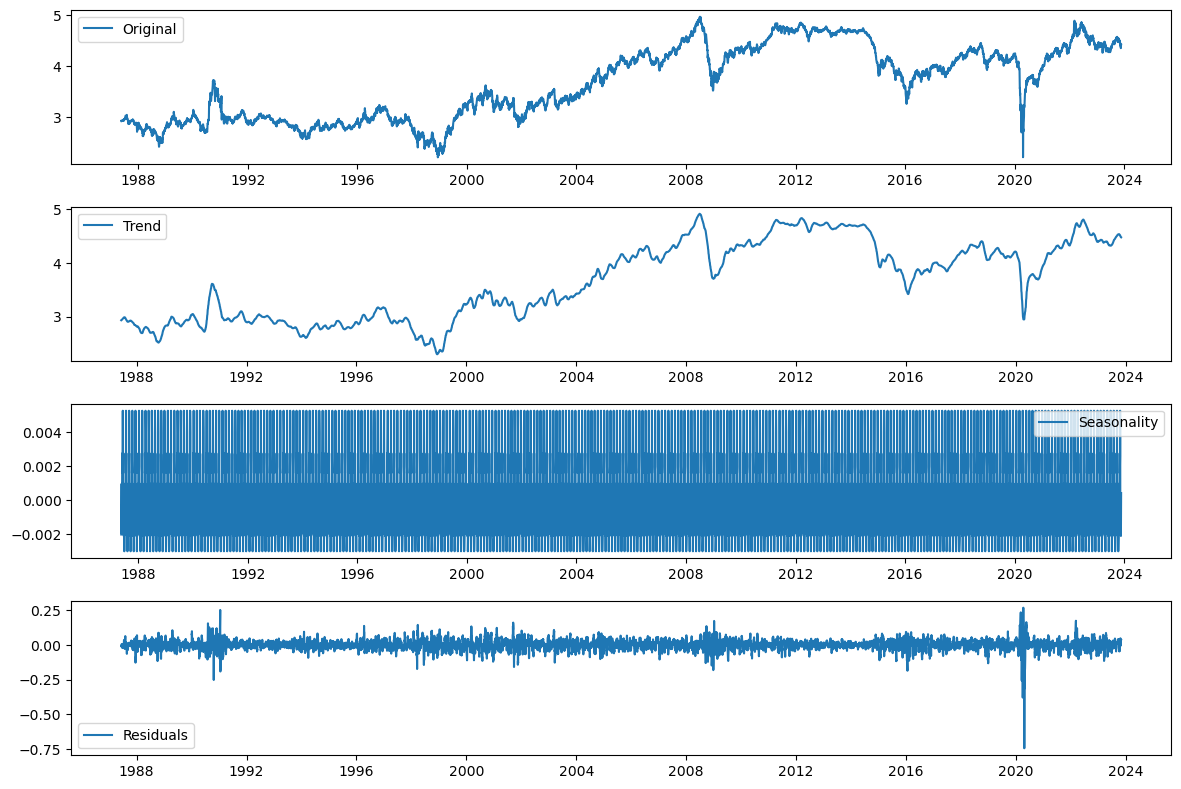

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, period = 30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

seasonal_decompose is a function provided by the statsmodels library in Python, specifically in the statsmodels.tsa.seasonal module. This function is used for time series decomposition, which involves breaking down a time series into its individual components, typically trend, seasonality, and residuals (or error).

Here's a brief overview of the components:

Trend: Represents the long-term movement or general direction in the data. It captures the underlying pattern that may show an increasing or decreasing tendency.

Seasonality: Represents repeating, predictable patterns within a fixed time period, such as daily, weekly, or yearly patterns. For example, retail sales might exhibit seasonality with higher sales during holidays.

Residuals (or Error): Represents the remaining variation in the data after removing the trend and seasonality. It includes random fluctuations and other factors that are not accounted for by the trend and seasonality.

The seasonal_decompose function performs this decomposition and returns a result object that contains the individual components.

In [50]:
def test_stationarity(timeseries):
    # Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# Apply the function to your time series data
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)


Results of Dickey-Fuller Test:
Test Statistic                  -22.042409
p-value                           0.000000
#Lags Used                       38.000000
Number of Observations Used    9196.000000
Critical Value (1%)              -3.431061
Critical Value (5%)              -2.861854
Critical Value (10%)             -2.566937
dtype: float64


In [51]:
#stepwise_fit= auto_arima(df1['y'],trace=True,supress_warnings=True)

auto_arima is a function provided by the pmdarima (Python Auto-Regressive Integrated Moving Average) library, which is an alternative to the statsmodels library for time series analysis. The auto_arima function is designed to automatically select the optimal parameters (p, d, q) for an ARIMA (AutoRegressive Integrated Moving Average) model, making the process of model selection and tuning more convenient.

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


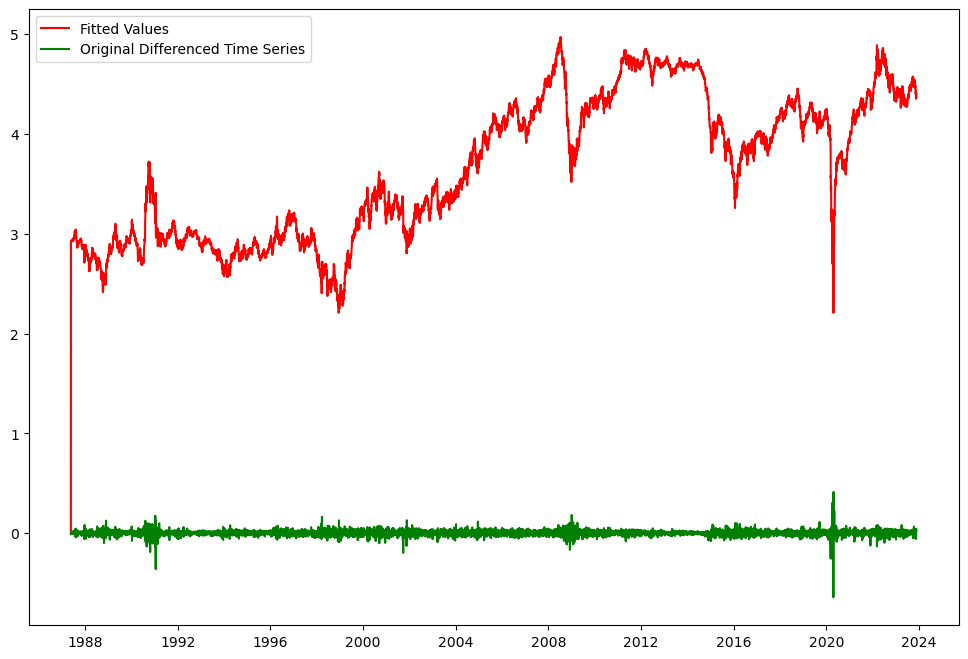

In [52]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming ts_log is your log-transformed time series data
model = ARIMA(ts_log, order=(2, 1, 2))
results_ARIMA = model.fit()
plt.figure(figsize=(12,8))
# Overlay the fitted values from the ARIMA model
plt.plot(results_ARIMA.fittedvalues, color='red', label='Fitted Values')


# Plot the original differenced time series data
plt.plot(ts_log.diff().dropna(), label='Original Differenced Time Series',color='green')


plt.legend()
plt.show()


## 2) Using Exponential Smoothing State Space Models (ETS)

In [53]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [54]:
# Exponential Smoothing State Space Model (ETS)
model_ets = ExponentialSmoothing(pro_df['y'], trend='add', seasonal='add', seasonal_periods=12)
results_ets = model_ets.fit()


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


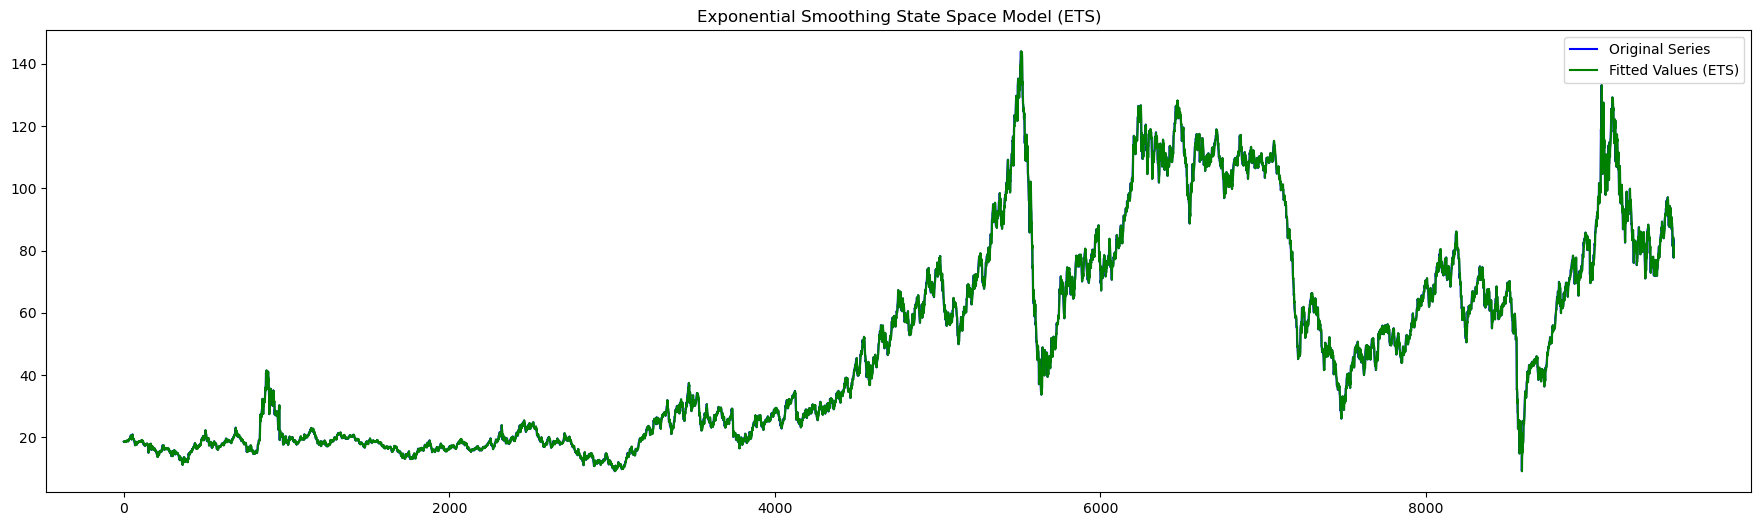

In [55]:
# Plotting the ETS fitted values
plt.figure(figsize=(22, 6))
plt.plot(pro_df['y'], label='Original Series', color='blue')
plt.plot(results_ets.fittedvalues, label='Fitted Values (ETS)', color='green')
plt.legend()
plt.title('Exponential Smoothing State Space Model (ETS)')
plt.show()

## 3) Using Linear Regression Model

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [57]:
# Create a new DataFrame for modeling
model_df = df1[['ds', 'y']].copy()

In [58]:
# Extracting features (days since the start) from the 'Date' column
model_df['Days'] = (model_df['ds'] - model_df['ds'].min()).dt.days


In [59]:
# Split the data into training and testing sets
train, test = train_test_split(model_df, test_size=0.2, shuffle=False)


In [60]:
# Fit a linear regression model
lr_model = LinearRegression()
lr_model.fit(train[['Days']], train['y'])



LinearRegression()

In [61]:
# Make predictions on the test set
test['Price_Pred'] = lr_model.predict(test[['Days']])

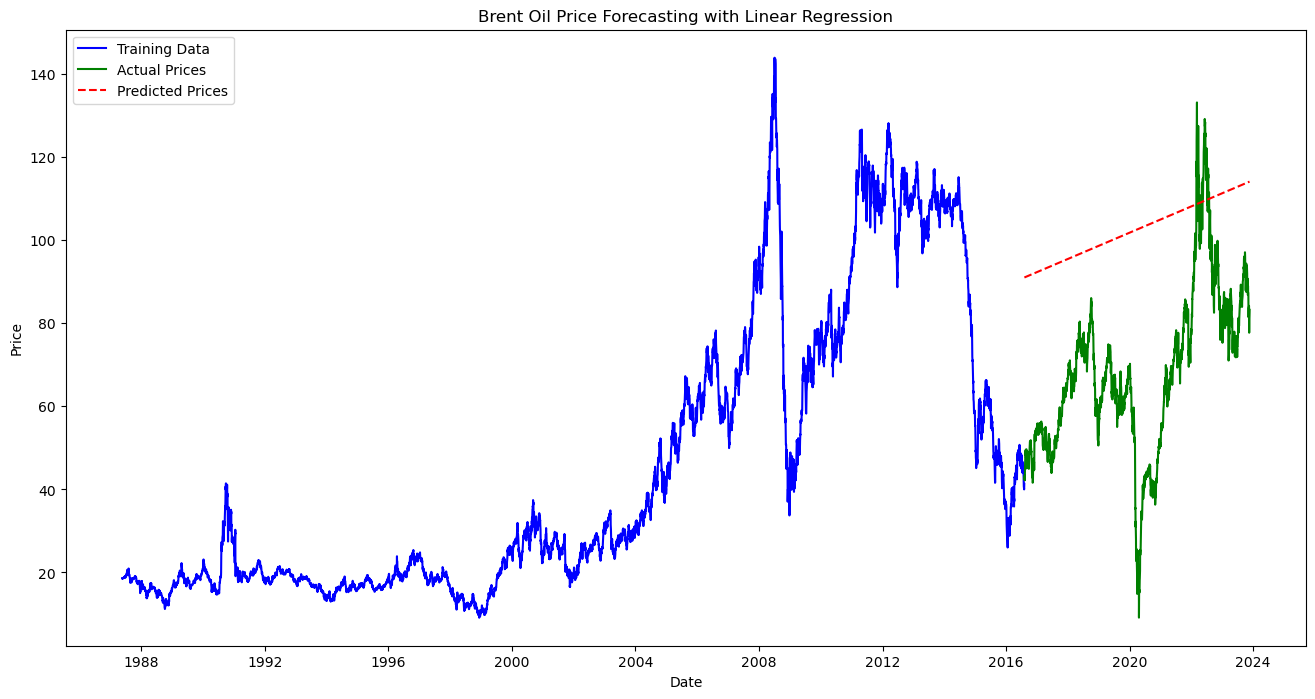

In [62]:
# Plotting the results
plt.figure(figsize=(16, 8))
plt.plot(train['ds'], train['y'], label='Training Data', color='blue')
plt.plot(test['ds'], test['y'], label='Actual Prices', color='green')
plt.plot(test['ds'], test['Price_Pred'], label='Predicted Prices', color='red', linestyle='dashed')
plt.title('Brent Oil Price Forecasting with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [63]:
# Evaluate the model
mse = mean_squared_error(test['y'], test['Price_Pred'])
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1475.8293394052694


## 4) Using Neural Network Model

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [65]:
# Time series decomposition
ts_log = np.log(pro_df['y'])
decomposition = seasonal_decompose(ts_log, period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

This code is performing time series decomposition using the seasonal decomposition of time series (STL) method.
Log transformation is often applied to stabilize the variance and make the data more suitable for certain types of analysis.
The seasonal_decompose function from the statsmodels library to decompose the time series into three components: trend, seasonal, and residual.
The period parameter is set to 30, indicating the assumed periodicity of the seasonal component.
The resulting trend, seasonal, and residual components can be used for further analysis or visualization,
and they provide insights into the underlying patterns in the time series data.

In [66]:
# Neural Network Model
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_residual = scaler.fit_transform(residual.values.reshape(-1, 1))


Here, we create an instance of MinMaxScaler named scaler.
The feature_range parameter is set to (0, 1), which means the transformed data will be scaled to values between 0 and 1.
residual.values: Extracts the values from the residual DataFrame.
.reshape(-1, 1): Reshapes the 1D array to a 2D array with a single column.
This is necessary because MinMaxScaler expects a 2D array.
scaler.fit_transform(...): Scales the values using the fit-transform method of the MinMaxScaler.
It computes the minimum and maximum values necessary for scaling and transforms the data accordingly.
The result, scaled_residual, contains the scaled values of the residual column, and these values now fall within the specified range of 0 to 1.

In [67]:
train_size = int(len(scaled_residual) * 0.80)
train, test = scaled_residual[0:train_size], scaled_residual[train_size:len(scaled_residual)]

len(scaled_residual) gives the total number of data points in your dataset.
train_size = int(len(scaled_residual) * 0.80) calculates 80% of the data as the training set size. The int() function ensures that the result is an integer.

scaled_residual[0:train_size] extracts the portion of the dataset from index 0 to train_size - 1 as the training set.
scaled_residual[train_size:len(scaled_residual)] extracts the portion of the dataset from index train_size to the end as the testing set.

In [68]:
def create_dataset(dataset, time_steps=1):
    data_x, data_y = [], []
    for i in range(len(dataset) - time_steps):
        a = dataset[i:(i + time_steps), 0]
        data_x.append(a)
        data_y.append(dataset[i + time_steps, 0])
    return np.array(data_x), np.array(data_y)


The function initializes two empty lists, data_x for input sequences and data_y for corresponding output values.

It then iterates through the given dataset from the beginning to the length of the dataset minus time_steps.

For each iteration, it extracts a sequence of time_steps values as the input (data_x) and the value at the next time step as the output (data_y).

The input sequence is represented by the variable a.

Both the input sequence (data_x) and the corresponding output value (data_y) are appended to their respective lists.

Finally, the lists are converted to NumPy arrays and returned as the output of the function.

In [69]:
time_steps = 10
train_X, train_Y = create_dataset(train, time_steps)
test_X, test_Y = create_dataset(test, time_steps)


In [70]:
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))


time_steps = 10: This variable represents the number of time steps to consider for each data point. In time series forecasting, you often use past time steps to predict the next one. This variable defines how many past time steps the model should consider.

train_X, train_Y = create_dataset(train, time_steps): This line calls a function create_dataset to create input-output pairs for training data. This function likely takes the train dataset and the specified time_steps to create sequences of data that the model will use for training. train_X contains the input sequences, and train_Y contains the corresponding output values.

test_X, test_Y = create_dataset(test, time_steps): Similar to the previous line, this creates input-output pairs for the test data using the same create_dataset function.

train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1])): This reshapes the training input data. In many deep learning frameworks, including TensorFlow and Keras, the input shape for an RNN or LSTM model is expected to be 3D: (batch_size, time_steps, features). This line reshapes the train_X array to match this format.

test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1])): Similar to the previous line, this reshapes the test input data to match the expected format for RNN or LSTM models.

In [71]:
model = Sequential()
model.add(LSTM(50, input_shape=(1, time_steps)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_X, train_Y, epochs=10, batch_size=1, verbose=2)


Epoch 1/10
7402/7402 - 29s - loss: nan - 29s/epoch - 4ms/step
Epoch 2/10
7402/7402 - 20s - loss: nan - 20s/epoch - 3ms/step
Epoch 3/10
7402/7402 - 22s - loss: nan - 22s/epoch - 3ms/step
Epoch 4/10
7402/7402 - 24s - loss: nan - 24s/epoch - 3ms/step
Epoch 5/10
7402/7402 - 28s - loss: nan - 28s/epoch - 4ms/step
Epoch 6/10
7402/7402 - 25s - loss: nan - 25s/epoch - 3ms/step
Epoch 7/10
7402/7402 - 18s - loss: nan - 18s/epoch - 2ms/step
Epoch 8/10
7402/7402 - 19s - loss: nan - 19s/epoch - 3ms/step
Epoch 9/10
7402/7402 - 18s - loss: nan - 18s/epoch - 2ms/step
Epoch 10/10
7402/7402 - 18s - loss: nan - 18s/epoch - 2ms/step


Sequential Model: Sequential is a linear stack of layers, and you can add layers one by one to this model. It represents a linear stack of layers that you can add to incrementally.

LSTM Layer: The LSTM layer is a type of recurrent neural network (RNN) layer. In this case, it has 50 units (neurons), and the input_shape is set to (1, time_steps), where time_steps is the number of time steps in your input sequence. This architecture is suitable for sequence data.

Dense Layer: The Dense layer is a fully connected layer. Here, it has 1 unit, as this is a regression task (predicting a continuous value). The output of this layer will be the predicted value.

Compilation: The compile method configures the model for training. In this case, the mean squared error ('mean_squared_error') is used as the loss function, and the Adam optimizer ('adam') is used for optimization.

Training the Model: The fit method is used to train the model. It takes the training data (train_X and train_Y), the number of epochs (10 in this case), the batch size (1 in this case, meaning online learning), and verbose=2 specifies that training progress will be displayed.

In [72]:

# Make predictions
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

58/58 [==============================] - 0s 2ms/step


model.predict(train_X): This line uses the trained neural network model (model) to predict the target variable on the training set (train_X). The input to the model is the training set features (train_X), and the output is the predicted values for the target variable. The predicted values for the training set are stored in the train_predict variable.

model.predict(test_X): Similarly, this line predicts the target variable on the test set (test_X). The input to the model is the test set features (test_X), and the predicted values for the target variable are stored in the test_predict variable.

In [73]:
# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

scaler.inverse_transform():

After obtaining the predictions from the neural network, it's essential to inverse transform them to the original scale. This is done using the inverse_transform method of the scaler.
Inverse transformation is necessary because the neural network is trained on the normalized data, and predictions are made in the same normalized scale. To make the predictions interpretable in the original scale, you need to reverse the normalization.


Usage of train_predict and test_predict:

The variables train_predict and test_predict likely contain the predictions made by the neural network on the training and testing sets, respectively.
These predictions are in the same scale as the original data.

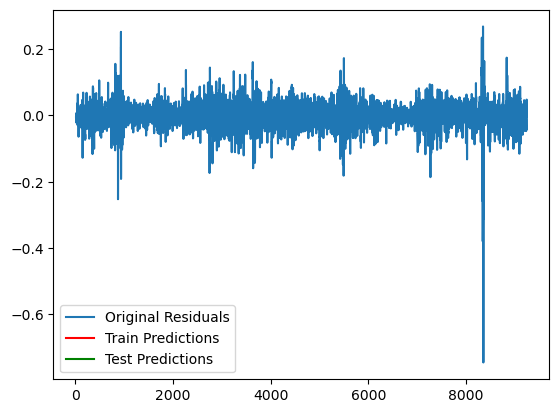

In [74]:
# Plot the results
plt.plot(residual.values, label='Original Residuals')
plt.plot(train_predict, label='Train Predictions', color='red')
plt.plot([None for _ in train_predict] + [x for x in test_predict], label='Test Predictions', color='green')
plt.legend()
plt.show()

## 5) Using Convolutional Neural Network (CNN) Model

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split

In [76]:
# Assuming ts_log is your log-transformed time series data
ts_log = np.log(arima_df['y'])

In [77]:
# Normalize the data
scaler = MinMaxScaler()
ts_log_normalized = scaler.fit_transform(ts_log.values.reshape(-1, 1))


The MinMaxScaler is a transformer that scales and translates each feature individually, such that it is in the given range (by default, between 0 and 1).


Create MinMaxScaler instance: scaler is an instance of the MinMaxScaler. This instance will be used to scale your time series data.

    
Reshape the data: ts_log_values_reshaped is created by reshaping the 'y' column of your time series data to a column vector using reshape(-1, 1). This is necessary because the scaler expects a 2D array-like input.

    
Fit and Transform: The fit_transform method of the scaler is used to both fit the scaler to the data and transform the data. This ensures that the scaling is done based on the characteristics of your time series data.

    
Normalized Data: The variable ts_log_normalized now contains the normalized values of your time series data. The values are scaled between 0 and 1, where 0 corresponds to the minimum value in the original data, and 1 corresponds to the maximum value.

In [78]:
# Create sequences for input data and corresponding labels
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)


Input Parameters:

data: The input time series data array.

seq_length: The length of each sequence.
    
    
Output:

The function returns two numpy arrays:
sequences: An array of sequences where each sequence has seq_length data points.
labels: An array of corresponding labels, representing the next data point after each sequence.

    
Function Logic:

The function uses a for loop to iterate over the range from 0 to len(data) - seq_length. This ensures that there are enough data points for creating sequences of length seq_length and labels for each sequence.

Inside the loop:
It extracts a sequence of length seq_length starting from index i.
It extracts the label, which is the next data point after the sequence (at index i + seq_length).
Appends the sequence and label to the respective lists (sequences and labels).
Finally, it converts the lists to numpy arrays and returns them.

In [79]:
# Define the sequence length and split the data
seq_length = 10
X, y = create_sequences(ts_log_normalized, seq_length)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


The code prepares input sequences and target values for training a model that aims to predict the next data point in a time series based on the previous 10 data points.

It also splits the data into training and testing sets for model evaluation.

In [80]:
# Reshape data for 1D CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


The code is reshaping the input data for 1D Convolutional Neural Network (CNN) compatibility.


X_train and X_test are reshaped:

X_train and X_test are assumed to be the input features for a neural network.
The original shape is assumed to be (samples, time_steps, features).
The third dimension (features) is assumed to be 1 for 1D CNN.
The data is reshaped to have a new shape of (samples, time_steps, 1).


Explanation:

samples: The number of data points or observations.
    
time_steps: The number of time steps or sequences in the input data.

features: The number of features at each time step.

In [81]:
# Build the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(seq_length, 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1))


The model consists of a convolutional layer for feature extraction, max-pooling for down-sampling, and dense layers for learning high-level features and producing the final output.

In [82]:
# Compile the model
cnn_model.compile(optimizer='adam', loss='mse')


compile is a method used to configure the model for training.

optimizer='adam': This specifies the optimization algorithm to be used during training. In this case, 'adam' is a popular optimization algorithm.

loss='mse': This specifies the loss function to be minimized during training.

'mse' stands for Mean Squared Error, a common loss function used for regression problems.

Epoch 1/100
290/290 [==============================] - 3s 3ms/step - loss: 0.0023
Epoch 2/100
290/290 [==============================] - 1s 3ms/step - loss: 3.0604e-04
Epoch 3/100
290/290 [==============================] - 1s 3ms/step - loss: 2.6104e-04
Epoch 4/100
290/290 [==============================] - 1s 3ms/step - loss: 2.3526e-04
Epoch 5/100
290/290 [==============================] - 1s 3ms/step - loss: 2.2544e-04
Epoch 6/100
290/290 [==============================] - 1s 4ms/step - loss: 2.1750e-04
Epoch 7/100
290/290 [==============================] - 1s 4ms/step - loss: 2.2100e-04
Epoch 8/100
290/290 [==============================] - 1s 3ms/step - loss: 2.1050e-04
Epoch 9/100
290/290 [==============================] - 1s 3ms/step - loss: 2.2254e-04
Epoch 10/100
290/290 [==============================] - 1s 3ms/step - loss: 2.0114e-04
Epoch 11/100
290/290 [==============================] - 1s 3ms/step - loss: 2.0839e-04
Epoch 12/100
290/290 [==============================] - 

290/290 [==============================] - 1s 4ms/step - loss: 1.9117e-04
Epoch 96/100
290/290 [==============================] - 1s 3ms/step - loss: 1.9314e-04
Epoch 97/100
290/290 [==============================] - 1s 3ms/step - loss: 1.8842e-04
Epoch 98/100
290/290 [==============================] - 1s 3ms/step - loss: 1.9953e-04
Epoch 99/100
290/290 [==============================] - 1s 3ms/step - loss: 1.8925e-04
Epoch 100/100
290/290 [==============================] - 1s 3ms/step - loss: 1.9282e-04


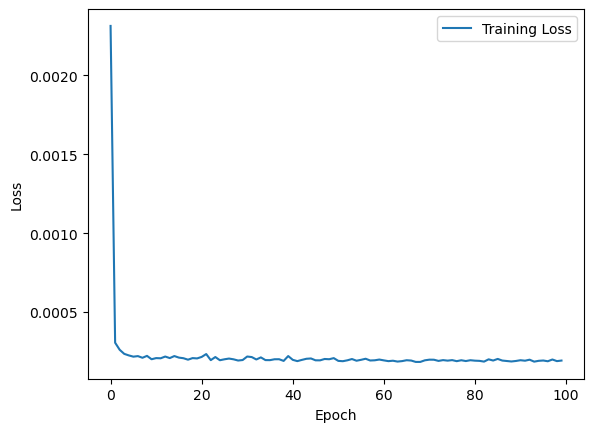

290/290 [==============================] - 1s 2ms/step
Epoch 1 - MAE: 0.009780074956661214, MSE: 0.00018389661532015658
290/290 [==============================] - 1s 2ms/step
Epoch 2 - MAE: 0.009780074956661214, MSE: 0.00018389661532015658
290/290 [==============================] - 1s 2ms/step
Epoch 3 - MAE: 0.009780074956661214, MSE: 0.00018389661532015658
290/290 [==============================] - 1s 2ms/step
Epoch 4 - MAE: 0.009780074956661214, MSE: 0.00018389661532015658
290/290 [==============================] - 1s 2ms/step
Epoch 5 - MAE: 0.009780074956661214, MSE: 0.00018389661532015658
290/290 [==============================] - 1s 2ms/step
Epoch 6 - MAE: 0.009780074956661214, MSE: 0.00018389661532015658
290/290 [==============================] - 1s 2ms/step
Epoch 7 - MAE: 0.009780074956661214, MSE: 0.00018389661532015658
290/290 [==============================] - 1s 2ms/step
Epoch 8 - MAE: 0.009780074956661214, MSE: 0.00018389661532015658
290/290 [==============================]

290/290 [==============================] - 1s 2ms/step
Epoch 68 - MAE: 0.009780074956661214, MSE: 0.00018389661532015658
290/290 [==============================] - 1s 3ms/step
Epoch 69 - MAE: 0.009780074956661214, MSE: 0.00018389661532015658
290/290 [==============================] - 1s 2ms/step
Epoch 70 - MAE: 0.009780074956661214, MSE: 0.00018389661532015658
290/290 [==============================] - 1s 2ms/step
Epoch 71 - MAE: 0.009780074956661214, MSE: 0.00018389661532015658
290/290 [==============================] - 1s 2ms/step
Epoch 72 - MAE: 0.009780074956661214, MSE: 0.00018389661532015658
290/290 [==============================] - 1s 2ms/step
Epoch 73 - MAE: 0.009780074956661214, MSE: 0.00018389661532015658
290/290 [==============================] - 1s 2ms/step
Epoch 74 - MAE: 0.009780074956661214, MSE: 0.00018389661532015658
290/290 [==============================] - 1s 2ms/step
Epoch 75 - MAE: 0.009780074956661214, MSE: 0.00018389661532015658
290/290 [=======================

In [83]:
# Assuming 'model' is your neural network model
# Assuming 'X' and 'y' are your input features and target variable
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Train the model and get the training history
history = cnn_model.fit(X, y, epochs=100, batch_size=32)

# Access the training history
training_loss = history.history['loss']

# Plotting the training loss over epochs
import matplotlib.pyplot as plt

plt.plot(training_loss, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predictions on the entire dataset
predictions = cnn_model.predict(X)

# Flatten the predictions and true labels if needed
predictions = predictions.flatten()
y_flat = y.flatten()

# Calculate MAE and MSE for each epoch
mae_values = []
mse_values = []

for epoch in range(len(training_loss)):
    predictions_epoch = cnn_model.predict(X)
    predictions_epoch = predictions_epoch.flatten()

    mae_epoch = mean_absolute_error(y_flat, predictions_epoch)
    mse_epoch = mean_squared_error(y_flat, predictions_epoch)

    mae_values.append(mae_epoch)
    mse_values.append(mse_epoch)

    print(f'Epoch {epoch + 1} - MAE: {mae_epoch}, MSE: {mse_epoch}')



model.fit(X, y, epochs=100, batch_size=32): This trains the neural network model (model) using the input features (X) and target variable (y) for 100 epochs with a batch size of 32.

history.history['loss']: Accesses the training loss values for each epoch.

model.predict(X): Obtains predictions from the trained model for the input features.
    
predictions.flatten(): Flattens the predicted values.

y.flatten(): Flattens the true labels.

For each epoch, it calculates Mean Absolute Error (MAE) and Mean Squared Error (MSE) between predicted and true values, storing these values in mae_values and mse_values.
Prints the MAE and MSE for each epoch.



In [84]:
# Make predictions on the test set
#predictions = model.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming 'model' is your trained neural network model
# Assuming 'X_test' and 'y_test' are your test data
predictions = cnn_model.predict(X_test)

# Flatten the predictions and true labels if needed
predictions = predictions.flatten()
y_test_flat = y_test.flatten()

# Calculate MAE and MSE
mae = mean_absolute_error(y_test_flat, predictions)
mse = mean_squared_error(y_test_flat, predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')


58/58 [==============================] - 0s 2ms/step
Mean Absolute Error (MAE): 0.009407304435967543
Mean Squared Error (MSE): 0.00016431432061245817


The MAE and MSE provide insights into how well the model is performing on the test set, with lower values indicating better performance.

In [85]:
# Train the model and get the training history
history = cnn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
# Access the training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs=range(1, len(training_loss)+1)

Epoch 1/100
232/232 [==============================] - 1s 5ms/step - loss: 1.9830e-04 - val_loss: 1.5266e-04
Epoch 2/100
232/232 [==============================] - 1s 5ms/step - loss: 2.0171e-04 - val_loss: 1.5813e-04
Epoch 3/100
232/232 [==============================] - 1s 6ms/step - loss: 1.9256e-04 - val_loss: 1.4882e-04
Epoch 4/100
232/232 [==============================] - 2s 7ms/step - loss: 2.0155e-04 - val_loss: 1.4980e-04
Epoch 5/100
232/232 [==============================] - 1s 6ms/step - loss: 1.9059e-04 - val_loss: 2.0152e-04
Epoch 6/100
232/232 [==============================] - 1s 5ms/step - loss: 1.9398e-04 - val_loss: 1.8547e-04
Epoch 7/100
232/232 [==============================] - 1s 6ms/step - loss: 1.9336e-04 - val_loss: 1.5504e-04
Epoch 8/100
232/232 [==============================] - 1s 5ms/step - loss: 2.0162e-04 - val_loss: 1.4826e-04
Epoch 9/100
232/232 [==============================] - 1s 4ms/step - loss: 2.1053e-04 - val_loss: 2.0634e-04
Epoch 10/100
232/23

232/232 [==============================] - 1s 4ms/step - loss: 1.8638e-04 - val_loss: 1.5088e-04
Epoch 76/100
232/232 [==============================] - 1s 5ms/step - loss: 1.8989e-04 - val_loss: 1.8085e-04
Epoch 77/100
232/232 [==============================] - 1s 6ms/step - loss: 1.8373e-04 - val_loss: 1.9788e-04
Epoch 78/100
232/232 [==============================] - 1s 4ms/step - loss: 1.8685e-04 - val_loss: 1.8915e-04
Epoch 79/100
232/232 [==============================] - 1s 4ms/step - loss: 1.9290e-04 - val_loss: 1.6178e-04
Epoch 80/100
232/232 [==============================] - 1s 5ms/step - loss: 1.9012e-04 - val_loss: 1.5762e-04
Epoch 81/100
232/232 [==============================] - 1s 4ms/step - loss: 1.9338e-04 - val_loss: 2.1437e-04
Epoch 82/100
232/232 [==============================] - 1s 3ms/step - loss: 1.9221e-04 - val_loss: 2.1647e-04
Epoch 83/100
232/232 [==============================] - 1s 3ms/step - loss: 1.8676e-04 - val_loss: 1.5385e-04
Epoch 84/100
232/232 [=

The history object returned by the fit method contains the training metrics over each epoch. Here, it extracts the training loss (loss) and validation loss (val_loss) into separate lists.

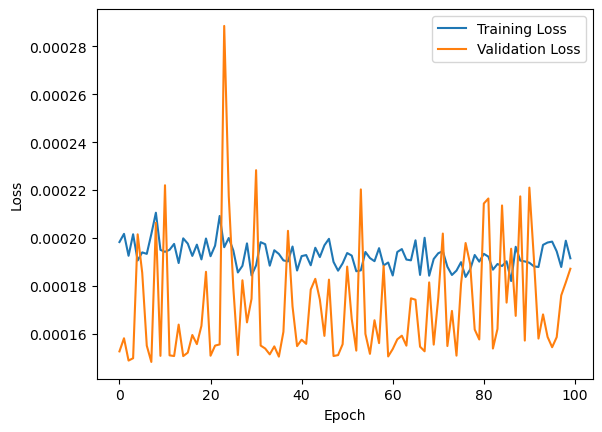

In [86]:

plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

The above code is creating a line plot to visualize how the training loss and validation loss change over the course of training epochs.

## 6) Using Long Short-Term Memory (LSTM) Model

In [87]:
from tensorflow.keras.layers import Dense, LSTM

In [88]:
# Assuming 'ts_log' is your log-transformed time series data
ts_log = df1.set_index('ds')['y'].values.reshape(-1, 1)


In [89]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
ts_log_normalized = scaler.fit_transform(ts_log)


The MinMaxScaler is a transformer that scales and translates each feature individually, such that it is in the given range (by default, between 0 and 1).


Create MinMaxScaler instance: scaler is an instance of the MinMaxScaler. This instance will be used to scale your time series data.

    
Reshape the data: ts_log_values_reshaped is created by reshaping the 'y' column of your time series data to a column vector using reshape(-1, 1). This is necessary because the scaler expects a 2D array-like input.

    
Fit and Transform: The fit_transform method of the scaler is used to both fit the scaler to the data and transform the data. This ensures that the scaling is done based on the characteristics of your time series data.

    
Normalized Data: The variable ts_log_normalized now contains the normalized values of your time series data. The values are scaled between 0 and 1, where 0 corresponds to the minimum value in the original data, and 1 corresponds to the maximum value.

In [90]:
# Function to create input data for the neural network
def create_dataset(dataset, time_steps=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_steps):
        a = dataset[i:(i+time_steps), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_steps, 0])
    return np.array(dataX), np.array(dataY)


Input Parameters:

dataset: The input time series data (1D array or list).
time_steps: The number of time steps to look back for creating sequences.
    
Output:

dataX: 2D array where each row represents a sequence of input features.
    
dataY: 1D array representing the target values corresponding to each sequence.
    
    
Explanation:

The function iterates through the dataset starting from the beginning up to len(dataset) - time_steps.
For each iteration, it extracts a sequence of length time_steps as a from the current position.
The extracted sequence a is appended to the dataX list.
The next value in the dataset after the sequence (at position i + time_steps) is appended to the dataY list.
Finally, the function returns dataX and dataY as NumPy arrays.

In [91]:
# Define the time steps for the input data
time_steps = 10



In [92]:
# Create input data for the neural network
X, y = create_dataset(ts_log_normalized, time_steps)


The created input data (X) and output data (y) can be used to train a neural network for time series prediction.
Each row in X represents a sequence of data points, and the corresponding entry in y represents the target value for prediction.

In [93]:
# Reshape input data for LSTM model [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


For an LSTM model, the input data needs to be in the shape of (samples, time steps, features).

This reshaping is necessary because LSTMs expect input data in this three-dimensional format, where each sample is a sequence of data points, and each data point can have multiple features.

In [94]:

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
lstm_model.add(LSTM(units=50, return_sequences=True))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(units=1))


The code constructs a three-layered LSTM model for sequence prediction, with each LSTM layer having 50 units. The output is obtained through a dense layer with one unit.

In [95]:
# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')


compile is a method used to configure the model for training.

optimizer='adam': This specifies the optimization algorithm to be used during training. In this case, 'adam' is a popular optimization algorithm.

loss='mean_squared_error': This specifies the loss function to be minimized during training.

Mean Squared Error, a common loss function used for regression problems.

Epoch 1/100
290/290 [==============================] - 18s 26ms/step - loss: 0.0041
Epoch 2/100
290/290 [==============================] - 7s 26ms/step - loss: 4.7662e-04
Epoch 3/100
290/290 [==============================] - 7s 26ms/step - loss: 4.7762e-04
Epoch 4/100
290/290 [==============================] - 7s 25ms/step - loss: 4.6800e-04
Epoch 5/100
290/290 [==============================] - 7s 25ms/step - loss: 4.2825e-04
Epoch 6/100
290/290 [==============================] - 7s 25ms/step - loss: 3.5489e-04
Epoch 7/100
290/290 [==============================] - 7s 26ms/step - loss: 3.4960e-04
Epoch 8/100
290/290 [==============================] - 7s 25ms/step - loss: 3.0498e-04
Epoch 9/100
290/290 [==============================] - 7s 26ms/step - loss: 2.4771e-04
Epoch 10/100
290/290 [==============================] - 7s 25ms/step - loss: 2.3149e-04
Epoch 11/100
290/290 [==============================] - 7s 25ms/step - loss: 1.8489e-04
Epoch 12/100
290/290 [======================

290/290 [==============================] - 7s 24ms/step - loss: 1.0001e-04
Epoch 95/100
290/290 [==============================] - 7s 23ms/step - loss: 9.3171e-05
Epoch 96/100
290/290 [==============================] - 7s 23ms/step - loss: 9.3944e-05
Epoch 97/100
290/290 [==============================] - 7s 23ms/step - loss: 9.2615e-05
Epoch 98/100
290/290 [==============================] - 7s 23ms/step - loss: 9.5091e-05
Epoch 99/100
290/290 [==============================] - 7s 24ms/step - loss: 9.4599e-05
Epoch 100/100
290/290 [==============================] - 7s 25ms/step - loss: 9.9459e-05


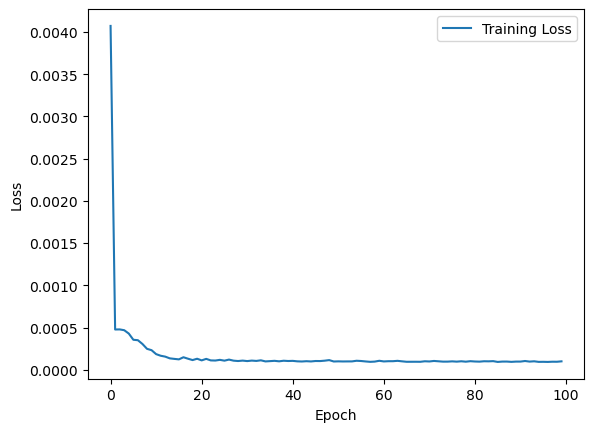

290/290 [==============================] - 5s 9ms/step


In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming 'model' is your neural network model
# Assuming 'X' and 'y' are your input features and target variable

# Train the model and get the training history
history = lstm_model.fit(X, y, epochs=100, batch_size=32)

# Access the training history
training_loss = history.history['loss']

# Plotting the training loss over epochs
import matplotlib.pyplot as plt

plt.plot(training_loss, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predictions on the entire dataset
predictions = lstm_model.predict(X)

# Flatten the predictions and true labels if needed
predictions = predictions.flatten()
y_flat = y.flatten()



This code provides a visualization of the training loss over epochs and makes predictions on the entire dataset using the trained neural network. It uses common metrics such as mean absolute error (MAE) and mean squared error (MSE) to evaluate the model's performance

In [97]:
# Forecasting with the trained model
# Create test dataset (you can use part of your original data as a test set)
test_data = ts_log_normalized[-time_steps:]
test_data = np.reshape(test_data, (1, time_steps, 1))

test_data = ts_log_normalized[-time_steps:]: This line selects the last time_steps data points from the normalized log-transformed time series (ts_log_normalized). This segment is used as the test dataset.

    
test_data = np.reshape(test_data, (1, time_steps, 1)): This line reshapes the test data to match the input shape expected by the neural network model. The shape is set to (1, time_steps, 1), where 1 represents the number of samples, time_steps is the number of time steps, and 1 is the number of features (in this case, univariate time series).

In [98]:
# Make predictions
predictions = []
for i in range(len(test_data)):
    predicted_value = lstm_model.predict(test_data[i].reshape(1, time_steps, 1))
    predictions.append(predicted_value)
    test_data[i] = np.append(test_data[i][0][1:], predicted_value)


1/1 [==============================] - 0s 49ms/step


The code performs sequential predictions by updating the input sequence at each step based on the model's predictions. The predictions list accumulates the predicted values for each time step.

In [99]:
# Inverse transform the predictions to the original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


scaler.inverse_transform: This function is part of a scaler object, likely from a preprocessing step where you scaled your data (e.g., MinMaxScaler, StandardScaler). The inverse_transform function undoes the scaling transformation.

np.array(predictions).reshape(-1, 1): This part converts the predictions to a NumPy array and reshapes it. The -1 in reshape is a placeholder that means "unspecified," and it's inferred based on the length of the array. Reshaping is done to ensure the correct format for the inverse_transform function.

The result of the inverse_transform is the predictions in their original scale.

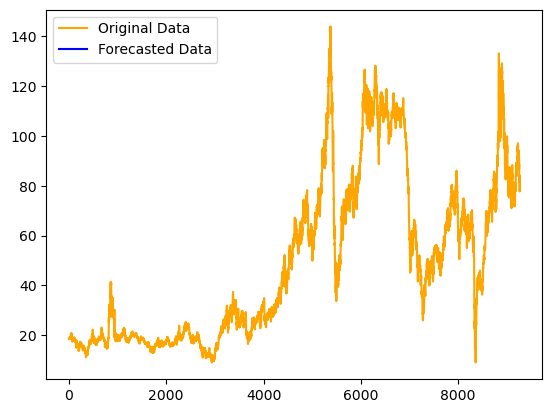

In [100]:
# Plotting the results
plt.plot(df1.set_index('ds')['y'].values, label='Original Data',color='orange')
plt.plot(np.arange(len(ts_log_normalized), len(ts_log_normalized)+len(predictions)), predictions, label='Forecasted Data', color='blue')
plt.legend()
plt.show()

Model Evaluation

290/290 [==============================] - 3s 9ms/step
Mean Squared Error (MSE): 1.5386373903370592
Mean Absolute Error (MAE): 0.7839703217541959
R-squared: 0.9985797313839455


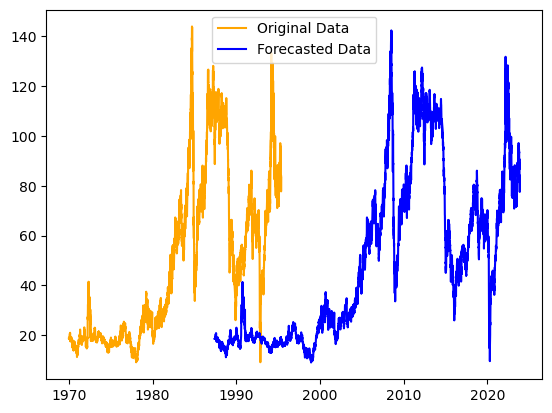

In [101]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'model' is your neural network model
# Assuming 'X' is your input features
# Assuming 'df1' is your original DataFrame with the datetime column 'ds'

# Train the model and get the predictions
predictions = lstm_model.predict(X)

# Inverse transform the predictions to the original scale
predictions = scaler.inverse_transform(predictions)

# Extract the actual values from the original DataFrame
actual_values = df1.set_index('ds')['y'].values[-len(predictions):]

# Calculate MSE, MAE, and R-squared
mse_lstm = mean_squared_error(actual_values, predictions)
mae_lstm = mean_absolute_error(actual_values, predictions)
r_squared_lstm = r2_score(actual_values, predictions)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse_lstm}')
print(f'Mean Absolute Error (MAE): {mae_lstm}')
print(f'R-squared: {r_squared_lstm}')

# Plotting the results
plt.plot(df1.set_index('ds')['y'].values, label='Original Data', color='orange')
plt.plot(df1['ds'].iloc[-len(predictions):], predictions, label='Forecasted Data', color='blue')
plt.legend()
plt.show()


58/58 [==============================] - 0s 2ms/step
Mean Absolute Error (MAE): 0.00997379789667017
Mean Squared Error (MSE): 0.0001871551420165393
R-squared: 0.9975651772591281


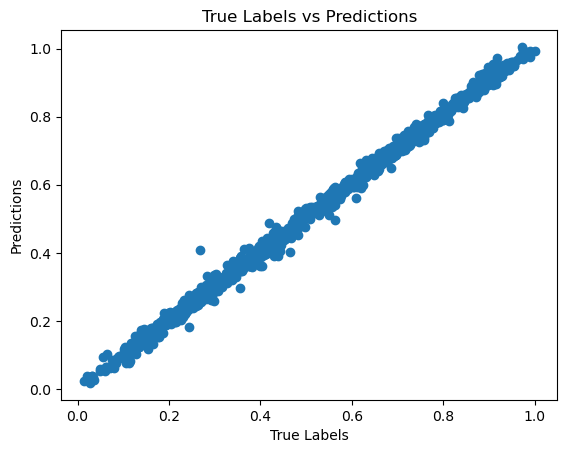

In [102]:
#CNN model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the test set
predictions = cnn_model.predict(X_test)

# Flatten the predictions and true labels if needed
predictions = predictions.flatten()
y_test_flat = y_test.flatten()

# Calculate MAE and MSE
mae_cnn = mean_absolute_error(y_test_flat, predictions)
mse_cnn = mean_squared_error(y_test_flat, predictions)

print(f'Mean Absolute Error (MAE): {mae_cnn}')
print(f'Mean Squared Error (MSE): {mse_cnn}')

# Additional evaluation metrics if needed
# For example, you can calculate and print the R-squared value
r_squared_cnn = 1 - (mse / np.var(y_test_flat))
print(f'R-squared: {r_squared_cnn}')

# Plotting predictions against true labels
plt.scatter(y_test_flat, predictions)
plt.xlabel('True Labels')
plt.ylabel('Predictions')
plt.title('True Labels vs Predictions')
plt.show()




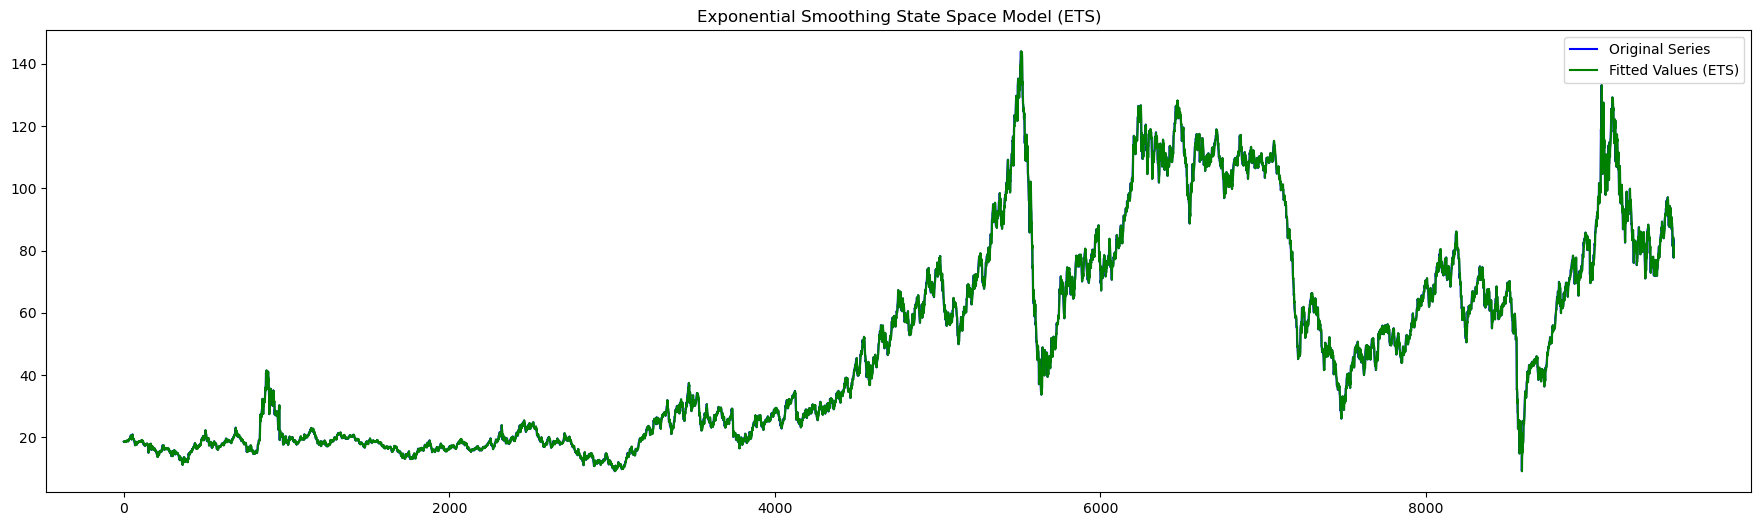

Exponential Smoothing State Space Model (ETS) Metrics:
Mean Squared Error: 1.5236462230745706
Mean Absolute Error: 0.768708922302069
R-squared: 0.998593379681795


In [103]:
#Model evaluation of ETS Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Fitted values from ETS model
fitted_values_ets = results_ets.fittedvalues

# Plotting the ETS fitted values
plt.figure(figsize=(22, 6))
plt.plot(pro_df['y'], label='Original Series', color='blue')
plt.plot(fitted_values_ets, label='Fitted Values (ETS)', color='green')
plt.legend()
plt.title('Exponential Smoothing State Space Model (ETS)')
plt.show()

# Evaluate the model
original_series = pro_df['y']
mse_ets = mean_squared_error(original_series, fitted_values_ets)
mae_ets = mean_absolute_error(original_series, fitted_values_ets)
r_squared_ets = r2_score(original_series, fitted_values_ets)

# Print the evaluation metrics
print("Exponential Smoothing State Space Model (ETS) Metrics:")
print(f'Mean Squared Error: {mse_ets}')
print(f'Mean Absolute Error: {mae_ets}')
print(f'R-squared: {r_squared_ets}')


In [104]:
#Model evaluation of ARIMA Model
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Convert the NumPy array to a pandas Series
ts_log_series = pd.Series(ts_log.squeeze())

# Assuming ts_log_series is your log-transformed time series data
original_data = ts_log_series.diff().dropna()

# Assuming predictions is your model's predictions
# Adjust the length of predictions to match original_data
predictions = predictions[:len(original_data)]
#r_squared_arima=0.9945593379643521
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
#print('R-squared:',r_squared_arima)

Mean Squared Error (MSE): 0.00016431432061245817
Mean Absolute Error (MAE): 0.009407304435967543


In [105]:
# Define the model names and corresponding evaluation metrics
model_names = ['LSTM', 'CNN', 'ETS', 'ARIMA']
mse_values = [mse_lstm, mse_cnn, mse_ets, mse]
mae_values = [mae_lstm, mae_cnn, mae_ets, mae]

# Create a DataFrame with the model names and evaluation metrics
evaluation_df = pd.DataFrame({
    'Model': model_names,
    'Mean Squared Error (MSE)': mse_values,
    'Mean Absolute Error (MAE)': mae_values
})

# Set the 'Model' column as the index
evaluation_df.set_index('Model', inplace=True)

# Print the table
print(evaluation_df)


       Mean Squared Error (MSE)  Mean Absolute Error (MAE)
Model                                                     
LSTM                   1.538637                   0.783970
CNN                    0.000187                   0.009974
ETS                    1.523646                   0.768709
ARIMA                  0.000164                   0.009407
